In [1]:
%%capture
!pip install gcpds-cv-pykit==0.1.0.57

In [2]:
import torch
from gcpds_cv_pykit.datasets import OxfordIITPet_Crowd
from gcpds_cv_pykit.crowd.dataloaders import AnnotHarmonyDataloader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.crowd.trainers import AnnotHarmonyTrainer
from gcpds_cv_pykit.crowd.models import AnnotHarmonyModel
from gcpds_cv_pykit.crowd.performance import PerformanceAnnotHarmony

In [3]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [4]:
OxfordIITPet_Crowd()

Path to downloaded dataset files: /kaggle/input/oxfordiiitpet-multi-annotators
Original dataset folder '/kaggle/input/oxfordiiitpet-multi-annotators' is read-only. Using it directly.


'/kaggle/input/oxfordiiitpet-multi-annotators'

In [ ]:
config = {"Dir of dataset": "/kaggle/input/oxfordiiitpet-multi-annotators", "Batch size": 36, 
          "Image size": (256,256), "Input size": (3,256,256),"Number of classes": 2, "Num of annotators": 3,"Single class train": None,
          "Single class test": None,"Single class valid": None, "Images folder": "patches","Data augmentation": True, "Epochs": 61,
          "Device": "cuda:0", "AMixPre": True, "Model": "AnnotHarmony", "Backbone": "resnet34","Pretrained": True, "Train phases": True,
          "Activation seg": "sparse_softmax", "Activation rel": "softmax", "Loss function": "TGCE_SS", "Save results": True,
          "Ground truth train":True,"Ground truth valid":True,"Ground truth test":True,"Annotators train":True,"Annotators valid":True,
          "Annotators test":True, "Q parameter": 0.7243854912956864,
          "Wandb monitoring": ["WandB_API_Key","MasterTests","OxfordIITPet_Crowd-AnnotHarmony-TGCE_SS"]}

In [6]:
train_dataset = AnnotHarmonyDataloader(
    data_dir=config['Dir of dataset'],
    batch_size=config['Batch size'],
    image_size=config['Image size'],
    num_classes=config['Number of classes'],
    num_annotators=config['Num of annotators'],
    partition='Train',
    annotators=config['Annotators train'],
    ground_truth=config['Ground truth train'],
    single_class=config['Single class train'],
    augment=True,
    num_workers=4)

[INFO] Found 1024 patch files in /kaggle/input/oxfordiiitpet-multi-annotators/Train/patches/*.png


Organizing masks:   0%|          | 0/1024 [00:00<?, ?it/s]

Organizing GT masks:   0%|          | 0/1024 [00:00<?, ?it/s]

In [7]:
valid_dataset = AnnotHarmonyDataloader(
    data_dir=config['Dir of dataset'],
    batch_size=config['Batch size'],
    image_size=config['Image size'],
    num_classes=config['Number of classes'],
    num_annotators=config['Num of annotators'],
    partition='Valid',
    annotators=config['Annotators valid'],
    ground_truth=config['Ground truth valid'],
    single_class=config['Single class valid'],
    augment=False,
    num_workers=4)

[INFO] Found 256 patch files in /kaggle/input/oxfordiiitpet-multi-annotators/Valid/patches/*.png


Organizing masks:   0%|          | 0/256 [00:00<?, ?it/s]

Organizing GT masks:   0%|          | 0/256 [00:00<?, ?it/s]

In [8]:
test_dataset = AnnotHarmonyDataloader(
    data_dir=config['Dir of dataset'],
    batch_size=config['Batch size'],
    image_size=config['Image size'],
    num_classes=config['Number of classes'],
    num_annotators=config['Num of annotators'],
    partition='Test',
    annotators=config['Annotators test'],
    ground_truth=config['Ground truth test'],
    single_class=config['Single class test'],
    augment=False,
    num_workers=4)

[INFO] Found 256 patch files in /kaggle/input/oxfordiiitpet-multi-annotators/Test/patches/*.png


Organizing masks:   0%|          | 0/256 [00:00<?, ?it/s]

Organizing GT masks:   0%|          | 0/256 [00:00<?, ?it/s]

Images: torch.Size([36, 3, 256, 256]), AnnsMasks: torch.Size([36, 6, 256, 256]), AnnsOneHot: torch.Size([36, 3]), GT: torch.Size([36, 2, 256, 256])


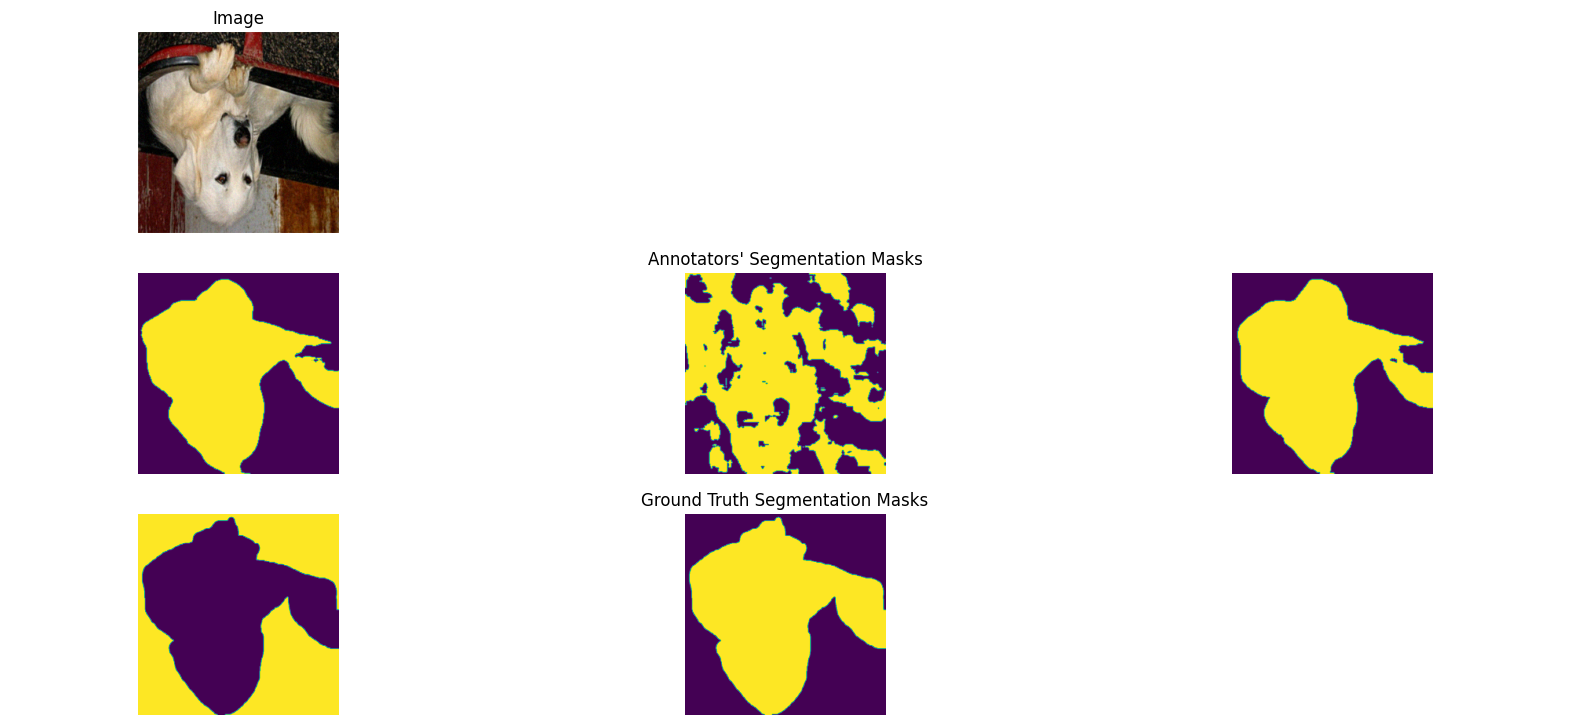

In [9]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],annotators=True,
                            num_annotators=config['Num of annotators'],type='annot_harmony',
                            single_class=config['Single class train'], ground_truth=config["Ground truth train"])

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 141MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.20.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250910_033255-9zqgm9o4
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run OxfordIITPet_Crowd-AnnotHarmony-TGCE_SS
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/9


Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 8/8 [00:07<00:00,  1.05it/s]


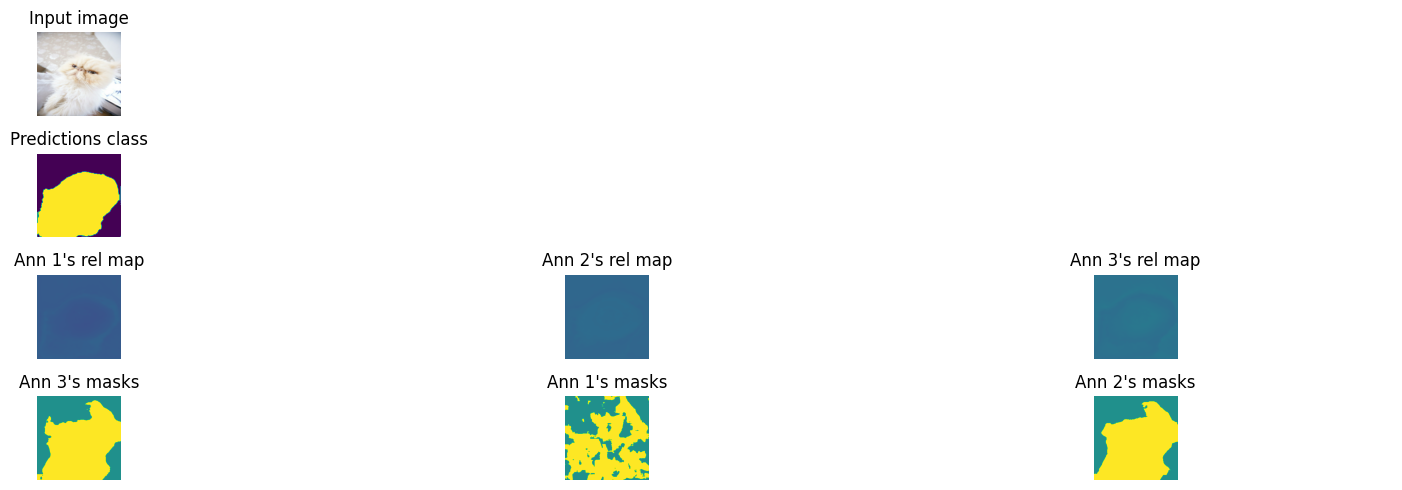

Train loss: 0.42448 | Time: 0m 37s | Val loss: 0.41464
Train_DICE_avg: 0.74965 | Train_Jaccard_avg: 0.62535 | Train_Sensitivity_avg: 0.80510 | Train_Specificity_avg: 0.78639 
Class 0 - Train_DICE: 0.74281 | Train_Jaccard: 0.61909 | Train_Sensitivity: 0.69128 | Train_Specificity: 0.87667 
Class 1 - Train_DICE: 0.75649 | Train_Jaccard: 0.63161 | Train_Sensitivity: 0.91893 | Train_Specificity: 0.69611 
Val_DICE_avg: 0.87189 | Val_Jaccard_avg: 0.78319 | Val_Sensitivity_avg: 0.89043 | Val_Specificity_avg: 0.89245 
Class 0 - Val_DICE: 0.89815 | Val_Jaccard: 0.82118 | Val_Sensitivity: 0.90641 | Val_Specificity: 0.87661 
Class 1 - Val_DICE: 0.84564 | Val_Jaccard: 0.74520 | Val_Sensitivity: 0.87444 | Val_Specificity: 0.90829 

Epoch 2/61


Training Epoch 2/61:   0%|          | 0/29 [00:00<?, ?it/s]wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
Validation Epoch 2/61: 100%|██████████| 8/8 [00:04<00:00,  1.62it/s]


Train loss: 0.40388 | Time: 1m 3s | Val loss: 0.40228
Train_DICE_avg: 0.87552 | Train_Jaccard_avg: 0.78930 | Train_Sensitivity_avg: 0.90152 | Train_Specificity_avg: 0.87517 
Class 0 - Train_DICE: 0.87808 | Train_Jaccard: 0.79466 | Train_Sensitivity: 0.89830 | Train_Specificity: 0.84671 
Class 1 - Train_DICE: 0.87296 | Train_Jaccard: 0.78393 | Train_Sensitivity: 0.90473 | Train_Specificity: 0.90364 
Val_DICE_avg: 0.91337 | Val_Jaccard_avg: 0.84846 | Val_Sensitivity_avg: 0.91595 | Val_Specificity_avg: 0.91833 
Class 0 - Val_DICE: 0.93335 | Val_Jaccard: 0.87936 | Val_Sensitivity: 0.95511 | Val_Specificity: 0.87993 
Class 1 - Val_DICE: 0.89339 | Val_Jaccard: 0.81756 | Val_Sensitivity: 0.87679 | Val_Specificity: 0.95674 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 8/8 [00:04<00:00,  1.60it/s]


Train loss: 0.39440 | Time: 1m 29s | Val loss: 0.39645
Train_DICE_avg: 0.89762 | Train_Jaccard_avg: 0.82298 | Train_Sensitivity_avg: 0.92031 | Train_Specificity_avg: 0.89268 
Class 0 - Train_DICE: 0.89730 | Train_Jaccard: 0.82375 | Train_Sensitivity: 0.92741 | Train_Specificity: 0.85443 
Class 1 - Train_DICE: 0.89793 | Train_Jaccard: 0.82221 | Train_Sensitivity: 0.91321 | Train_Specificity: 0.93092 
Val_DICE_avg: 0.92958 | Val_Jaccard_avg: 0.87455 | Val_Sensitivity_avg: 0.93333 | Val_Specificity_avg: 0.93578 
Class 0 - Val_DICE: 0.94358 | Val_Jaccard: 0.89693 | Val_Sensitivity: 0.95336 | Val_Specificity: 0.91641 
Class 1 - Val_DICE: 0.91558 | Val_Jaccard: 0.85216 | Val_Sensitivity: 0.91330 | Val_Specificity: 0.95516 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]


Train loss: 0.38878 | Time: 1m 55s | Val loss: 0.39252
Train_DICE_avg: 0.90648 | Train_Jaccard_avg: 0.83753 | Train_Sensitivity_avg: 0.92660 | Train_Specificity_avg: 0.90151 
Class 0 - Train_DICE: 0.90587 | Train_Jaccard: 0.83832 | Train_Sensitivity: 0.93370 | Train_Specificity: 0.86672 
Class 1 - Train_DICE: 0.90710 | Train_Jaccard: 0.83673 | Train_Sensitivity: 0.91949 | Train_Specificity: 0.93630 
Val_DICE_avg: 0.93402 | Val_Jaccard_avg: 0.88217 | Val_Sensitivity_avg: 0.93882 | Val_Specificity_avg: 0.94128 
Class 0 - Val_DICE: 0.94710 | Val_Jaccard: 0.90314 | Val_Sensitivity: 0.95657 | Val_Specificity: 0.92419 
Class 1 - Val_DICE: 0.92094 | Val_Jaccard: 0.86120 | Val_Sensitivity: 0.92108 | Val_Specificity: 0.95838 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 8/8 [00:05<00:00,  1.58it/s]


Train loss: 0.38614 | Time: 2m 21s | Val loss: 0.39141
Train_DICE_avg: 0.90754 | Train_Jaccard_avg: 0.83920 | Train_Sensitivity_avg: 0.93052 | Train_Specificity_avg: 0.90068 
Class 0 - Train_DICE: 0.90532 | Train_Jaccard: 0.83695 | Train_Sensitivity: 0.93694 | Train_Specificity: 0.86326 
Class 1 - Train_DICE: 0.90976 | Train_Jaccard: 0.84144 | Train_Sensitivity: 0.92410 | Train_Specificity: 0.93809 
Val_DICE_avg: 0.93856 | Val_Jaccard_avg: 0.89005 | Val_Sensitivity_avg: 0.94198 | Val_Specificity_avg: 0.94444 
Class 0 - Val_DICE: 0.95065 | Val_Jaccard: 0.90950 | Val_Sensitivity: 0.96154 | Val_Specificity: 0.92546 
Class 1 - Val_DICE: 0.92648 | Val_Jaccard: 0.87061 | Val_Sensitivity: 0.92242 | Val_Specificity: 0.96341 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


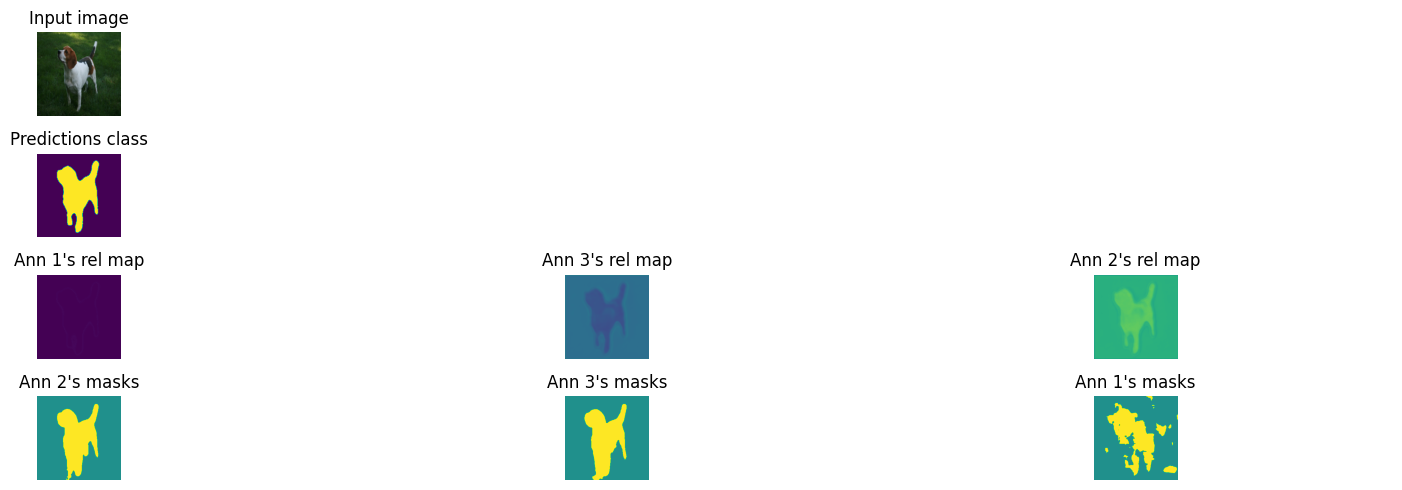

Train loss: 0.38418 | Time: 2m 47s | Val loss: 0.39053
Train_DICE_avg: 0.91379 | Train_Jaccard_avg: 0.84915 | Train_Sensitivity_avg: 0.93470 | Train_Specificity_avg: 0.90542 
Class 0 - Train_DICE: 0.91179 | Train_Jaccard: 0.84698 | Train_Sensitivity: 0.94308 | Train_Specificity: 0.86701 
Class 1 - Train_DICE: 0.91579 | Train_Jaccard: 0.85133 | Train_Sensitivity: 0.92633 | Train_Specificity: 0.94383 
Val_DICE_avg: 0.93890 | Val_Jaccard_avg: 0.89039 | Val_Sensitivity_avg: 0.93936 | Val_Specificity_avg: 0.94194 
Class 0 - Val_DICE: 0.95184 | Val_Jaccard: 0.91136 | Val_Sensitivity: 0.96824 | Val_Specificity: 0.91405 
Class 1 - Val_DICE: 0.92595 | Val_Jaccard: 0.86942 | Val_Sensitivity: 0.91048 | Val_Specificity: 0.96983 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Train loss: 0.38301 | Time: 3m 12s | Val loss: 0.38951
Train_DICE_avg: 0.91610 | Train_Jaccard_avg: 0.85329 | Train_Sensitivity_avg: 0.93752 | Train_Specificity_avg: 0.90983 
Class 0 - Train_DICE: 0.91418 | Train_Jaccard: 0.85090 | Train_Sensitivity: 0.94151 | Train_Specificity: 0.87738 
Class 1 - Train_DICE: 0.91802 | Train_Jaccard: 0.85567 | Train_Sensitivity: 0.93354 | Train_Specificity: 0.94228 
Val_DICE_avg: 0.94262 | Val_Jaccard_avg: 0.89695 | Val_Sensitivity_avg: 0.94704 | Val_Specificity_avg: 0.94948 
Class 0 - Val_DICE: 0.95319 | Val_Jaccard: 0.91406 | Val_Sensitivity: 0.95444 | Val_Specificity: 0.94240 
Class 1 - Val_DICE: 0.93205 | Val_Jaccard: 0.87984 | Val_Sensitivity: 0.93964 | Val_Specificity: 0.95656 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


Train loss: 0.38144 | Time: 3m 37s | Val loss: 0.38913
Train_DICE_avg: 0.92190 | Train_Jaccard_avg: 0.86268 | Train_Sensitivity_avg: 0.94142 | Train_Specificity_avg: 0.91348 
Class 0 - Train_DICE: 0.91858 | Train_Jaccard: 0.85801 | Train_Sensitivity: 0.94742 | Train_Specificity: 0.87888 
Class 1 - Train_DICE: 0.92523 | Train_Jaccard: 0.86734 | Train_Sensitivity: 0.93542 | Train_Specificity: 0.94807 
Val_DICE_avg: 0.94256 | Val_Jaccard_avg: 0.89687 | Val_Sensitivity_avg: 0.94677 | Val_Specificity_avg: 0.94922 
Class 0 - Val_DICE: 0.95329 | Val_Jaccard: 0.91406 | Val_Sensitivity: 0.95225 | Val_Specificity: 0.94404 
Class 1 - Val_DICE: 0.93183 | Val_Jaccard: 0.87968 | Val_Sensitivity: 0.94130 | Val_Specificity: 0.95439 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Train loss: 0.38076 | Time: 4m 1s | Val loss: 0.38880
Train_DICE_avg: 0.92174 | Train_Jaccard_avg: 0.86225 | Train_Sensitivity_avg: 0.94205 | Train_Specificity_avg: 0.91249 
Class 0 - Train_DICE: 0.91788 | Train_Jaccard: 0.85730 | Train_Sensitivity: 0.94972 | Train_Specificity: 0.87510 
Class 1 - Train_DICE: 0.92560 | Train_Jaccard: 0.86720 | Train_Sensitivity: 0.93438 | Train_Specificity: 0.94989 
Val_DICE_avg: 0.94482 | Val_Jaccard_avg: 0.90046 | Val_Sensitivity_avg: 0.94683 | Val_Specificity_avg: 0.94932 
Class 0 - Val_DICE: 0.95492 | Val_Jaccard: 0.91708 | Val_Sensitivity: 0.95650 | Val_Specificity: 0.94010 
Class 1 - Val_DICE: 0.93472 | Val_Jaccard: 0.88384 | Val_Sensitivity: 0.93716 | Val_Specificity: 0.95855 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Train loss: 0.38018 | Time: 4m 26s | Val loss: 0.38819
Train_DICE_avg: 0.92293 | Train_Jaccard_avg: 0.86402 | Train_Sensitivity_avg: 0.94310 | Train_Specificity_avg: 0.91475 
Class 0 - Train_DICE: 0.91880 | Train_Jaccard: 0.85843 | Train_Sensitivity: 0.94916 | Train_Specificity: 0.88000 
Class 1 - Train_DICE: 0.92706 | Train_Jaccard: 0.86962 | Train_Sensitivity: 0.93703 | Train_Specificity: 0.94951 
Val_DICE_avg: 0.94564 | Val_Jaccard_avg: 0.90225 | Val_Sensitivity_avg: 0.94988 | Val_Specificity_avg: 0.95238 
Class 0 - Val_DICE: 0.95621 | Val_Jaccard: 0.91923 | Val_Sensitivity: 0.95808 | Val_Specificity: 0.94471 
Class 1 - Val_DICE: 0.93507 | Val_Jaccard: 0.88526 | Val_Sensitivity: 0.94167 | Val_Specificity: 0.96004 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


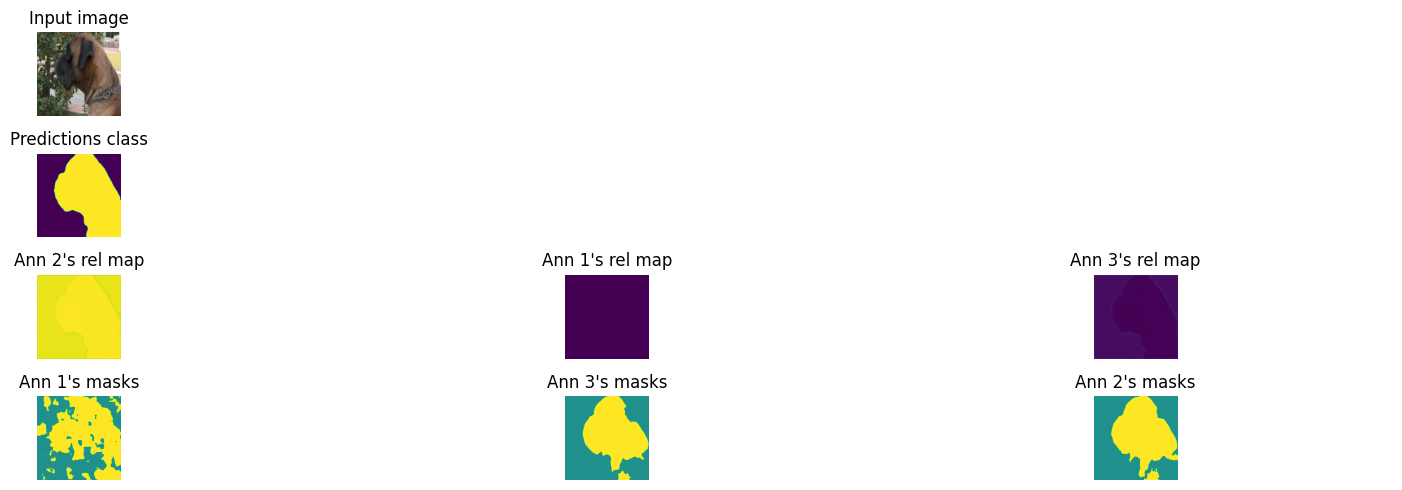

Train loss: 0.37954 | Time: 4m 53s | Val loss: 0.38756
Train_DICE_avg: 0.92325 | Train_Jaccard_avg: 0.86472 | Train_Sensitivity_avg: 0.94216 | Train_Specificity_avg: 0.91421 
Class 0 - Train_DICE: 0.91902 | Train_Jaccard: 0.85894 | Train_Sensitivity: 0.95055 | Train_Specificity: 0.87643 
Class 1 - Train_DICE: 0.92748 | Train_Jaccard: 0.87049 | Train_Sensitivity: 0.93376 | Train_Specificity: 0.95199 
Val_DICE_avg: 0.94653 | Val_Jaccard_avg: 0.90388 | Val_Sensitivity_avg: 0.94885 | Val_Specificity_avg: 0.95142 
Class 0 - Val_DICE: 0.95746 | Val_Jaccard: 0.92149 | Val_Sensitivity: 0.96406 | Val_Specificity: 0.93699 
Class 1 - Val_DICE: 0.93560 | Val_Jaccard: 0.88628 | Val_Sensitivity: 0.93364 | Val_Specificity: 0.96586 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


Train loss: 0.37830 | Time: 5m 18s | Val loss: 0.38680
Train_DICE_avg: 0.92622 | Train_Jaccard_avg: 0.86940 | Train_Sensitivity_avg: 0.94623 | Train_Specificity_avg: 0.91682 
Class 0 - Train_DICE: 0.92142 | Train_Jaccard: 0.86262 | Train_Sensitivity: 0.95136 | Train_Specificity: 0.88247 
Class 1 - Train_DICE: 0.93103 | Train_Jaccard: 0.87619 | Train_Sensitivity: 0.94111 | Train_Specificity: 0.95116 
Val_DICE_avg: 0.94712 | Val_Jaccard_avg: 0.90472 | Val_Sensitivity_avg: 0.95218 | Val_Specificity_avg: 0.95460 
Class 0 - Val_DICE: 0.95728 | Val_Jaccard: 0.92104 | Val_Sensitivity: 0.96013 | Val_Specificity: 0.94692 
Class 1 - Val_DICE: 0.93697 | Val_Jaccard: 0.88839 | Val_Sensitivity: 0.94423 | Val_Specificity: 0.96228 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Train loss: 0.37839 | Time: 5m 43s | Val loss: 0.38672
Train_DICE_avg: 0.92608 | Train_Jaccard_avg: 0.86913 | Train_Sensitivity_avg: 0.94484 | Train_Specificity_avg: 0.91672 
Class 0 - Train_DICE: 0.92324 | Train_Jaccard: 0.86523 | Train_Sensitivity: 0.95309 | Train_Specificity: 0.88018 
Class 1 - Train_DICE: 0.92892 | Train_Jaccard: 0.87304 | Train_Sensitivity: 0.93659 | Train_Specificity: 0.95326 
Val_DICE_avg: 0.94696 | Val_Jaccard_avg: 0.90499 | Val_Sensitivity_avg: 0.95053 | Val_Specificity_avg: 0.95306 
Class 0 - Val_DICE: 0.95761 | Val_Jaccard: 0.92176 | Val_Sensitivity: 0.96330 | Val_Specificity: 0.94086 
Class 1 - Val_DICE: 0.93631 | Val_Jaccard: 0.88822 | Val_Sensitivity: 0.93776 | Val_Specificity: 0.96526 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Train loss: 0.37730 | Time: 6m 9s | Val loss: 0.38590
Train_DICE_avg: 0.92601 | Train_Jaccard_avg: 0.86924 | Train_Sensitivity_avg: 0.94570 | Train_Specificity_avg: 0.91793 
Class 0 - Train_DICE: 0.92432 | Train_Jaccard: 0.86768 | Train_Sensitivity: 0.95021 | Train_Specificity: 0.89245 
Class 1 - Train_DICE: 0.92770 | Train_Jaccard: 0.87080 | Train_Sensitivity: 0.94118 | Train_Specificity: 0.94342 
Val_DICE_avg: 0.94916 | Val_Jaccard_avg: 0.90789 | Val_Sensitivity_avg: 0.95139 | Val_Specificity_avg: 0.95394 
Class 0 - Val_DICE: 0.95883 | Val_Jaccard: 0.92373 | Val_Sensitivity: 0.96176 | Val_Specificity: 0.94415 
Class 1 - Val_DICE: 0.93948 | Val_Jaccard: 0.89204 | Val_Sensitivity: 0.94102 | Val_Specificity: 0.96373 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Train loss: 0.37691 | Time: 6m 34s | Val loss: 0.38579
Train_DICE_avg: 0.92565 | Train_Jaccard_avg: 0.86861 | Train_Sensitivity_avg: 0.94626 | Train_Specificity_avg: 0.91958 
Class 0 - Train_DICE: 0.92901 | Train_Jaccard: 0.87475 | Train_Sensitivity: 0.95478 | Train_Specificity: 0.89694 
Class 1 - Train_DICE: 0.92229 | Train_Jaccard: 0.86247 | Train_Sensitivity: 0.93774 | Train_Specificity: 0.94223 
Val_DICE_avg: 0.94829 | Val_Jaccard_avg: 0.90658 | Val_Sensitivity_avg: 0.95233 | Val_Specificity_avg: 0.95480 
Class 0 - Val_DICE: 0.95789 | Val_Jaccard: 0.92215 | Val_Sensitivity: 0.95755 | Val_Specificity: 0.94990 
Class 1 - Val_DICE: 0.93869 | Val_Jaccard: 0.89102 | Val_Sensitivity: 0.94710 | Val_Specificity: 0.95970 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


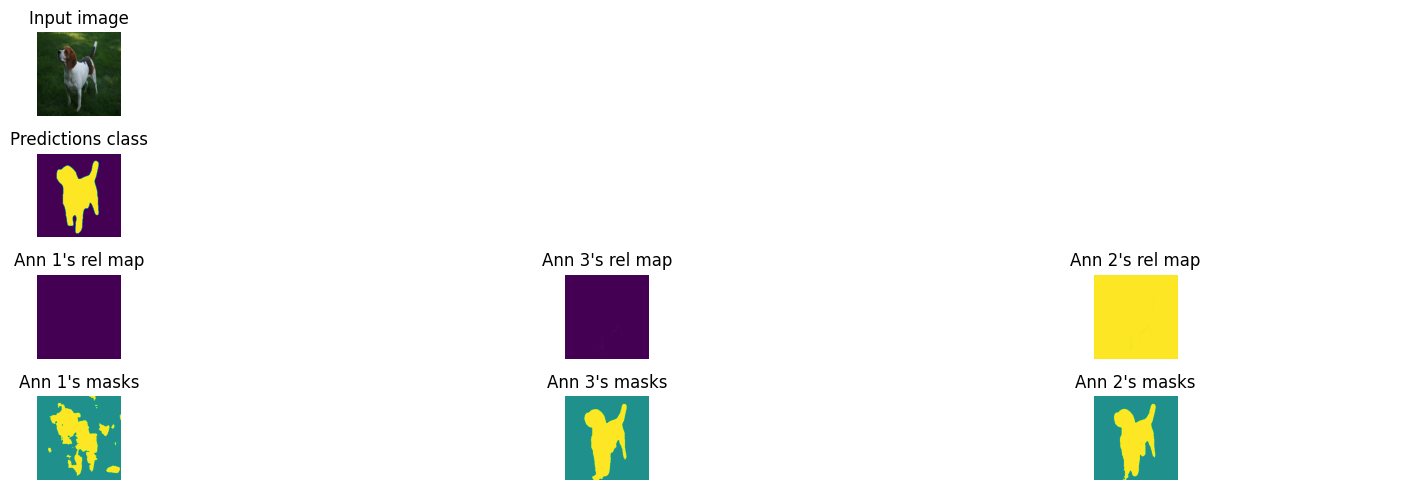

Train loss: 0.37649 | Time: 7m 0s | Val loss: 0.38564
Train_DICE_avg: 0.92756 | Train_Jaccard_avg: 0.87147 | Train_Sensitivity_avg: 0.94744 | Train_Specificity_avg: 0.92146 
Class 0 - Train_DICE: 0.93007 | Train_Jaccard: 0.87645 | Train_Sensitivity: 0.95229 | Train_Specificity: 0.90169 
Class 1 - Train_DICE: 0.92504 | Train_Jaccard: 0.86648 | Train_Sensitivity: 0.94259 | Train_Specificity: 0.94122 
Val_DICE_avg: 0.94906 | Val_Jaccard_avg: 0.90782 | Val_Sensitivity_avg: 0.95323 | Val_Specificity_avg: 0.95569 
Class 0 - Val_DICE: 0.95844 | Val_Jaccard: 0.92305 | Val_Sensitivity: 0.95912 | Val_Specificity: 0.95011 
Class 1 - Val_DICE: 0.93968 | Val_Jaccard: 0.89259 | Val_Sensitivity: 0.94733 | Val_Specificity: 0.96127 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Train loss: 0.37592 | Time: 7m 25s | Val loss: 0.38532
Train_DICE_avg: 0.92892 | Train_Jaccard_avg: 0.87335 | Train_Sensitivity_avg: 0.94840 | Train_Specificity_avg: 0.92310 
Class 0 - Train_DICE: 0.93086 | Train_Jaccard: 0.87742 | Train_Sensitivity: 0.95857 | Train_Specificity: 0.89792 
Class 1 - Train_DICE: 0.92698 | Train_Jaccard: 0.86929 | Train_Sensitivity: 0.93822 | Train_Specificity: 0.94827 
Val_DICE_avg: 0.94625 | Val_Jaccard_avg: 0.90398 | Val_Sensitivity_avg: 0.94772 | Val_Specificity_avg: 0.95024 
Class 0 - Val_DICE: 0.95697 | Val_Jaccard: 0.92087 | Val_Sensitivity: 0.96466 | Val_Specificity: 0.93383 
Class 1 - Val_DICE: 0.93553 | Val_Jaccard: 0.88708 | Val_Sensitivity: 0.93078 | Val_Specificity: 0.96666 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Train loss: 0.37544 | Time: 7m 50s | Val loss: 0.38515
Train_DICE_avg: 0.92718 | Train_Jaccard_avg: 0.87078 | Train_Sensitivity_avg: 0.94771 | Train_Specificity_avg: 0.91973 
Class 0 - Train_DICE: 0.93219 | Train_Jaccard: 0.87982 | Train_Sensitivity: 0.95054 | Train_Specificity: 0.90633 
Class 1 - Train_DICE: 0.92217 | Train_Jaccard: 0.86174 | Train_Sensitivity: 0.94487 | Train_Specificity: 0.93313 
Val_DICE_avg: 0.94854 | Val_Jaccard_avg: 0.90708 | Val_Sensitivity_avg: 0.95150 | Val_Specificity_avg: 0.95404 
Class 0 - Val_DICE: 0.95844 | Val_Jaccard: 0.92304 | Val_Sensitivity: 0.96438 | Val_Specificity: 0.94175 
Class 1 - Val_DICE: 0.93865 | Val_Jaccard: 0.89113 | Val_Sensitivity: 0.93862 | Val_Specificity: 0.96632 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


Train loss: 0.37526 | Time: 8m 15s | Val loss: 0.38505
Train_DICE_avg: 0.92924 | Train_Jaccard_avg: 0.87425 | Train_Sensitivity_avg: 0.94853 | Train_Specificity_avg: 0.92320 
Class 0 - Train_DICE: 0.93359 | Train_Jaccard: 0.88231 | Train_Sensitivity: 0.95570 | Train_Specificity: 0.90486 
Class 1 - Train_DICE: 0.92488 | Train_Jaccard: 0.86620 | Train_Sensitivity: 0.94136 | Train_Specificity: 0.94155 
Val_DICE_avg: 0.94889 | Val_Jaccard_avg: 0.90783 | Val_Sensitivity_avg: 0.95217 | Val_Specificity_avg: 0.95468 
Class 0 - Val_DICE: 0.95867 | Val_Jaccard: 0.92348 | Val_Sensitivity: 0.95814 | Val_Specificity: 0.94910 
Class 1 - Val_DICE: 0.93912 | Val_Jaccard: 0.89218 | Val_Sensitivity: 0.94621 | Val_Specificity: 0.96027 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


Train loss: 0.37492 | Time: 8m 41s | Val loss: 0.38522
Train_DICE_avg: 0.92977 | Train_Jaccard_avg: 0.87534 | Train_Sensitivity_avg: 0.95033 | Train_Specificity_avg: 0.92487 
Class 0 - Train_DICE: 0.93377 | Train_Jaccard: 0.88244 | Train_Sensitivity: 0.95720 | Train_Specificity: 0.90593 
Class 1 - Train_DICE: 0.92577 | Train_Jaccard: 0.86824 | Train_Sensitivity: 0.94346 | Train_Specificity: 0.94380 
Val_DICE_avg: 0.94782 | Val_Jaccard_avg: 0.90629 | Val_Sensitivity_avg: 0.94915 | Val_Specificity_avg: 0.95173 
Class 0 - Val_DICE: 0.95817 | Val_Jaccard: 0.92277 | Val_Sensitivity: 0.96659 | Val_Specificity: 0.93498 
Class 1 - Val_DICE: 0.93746 | Val_Jaccard: 0.88982 | Val_Sensitivity: 0.93170 | Val_Specificity: 0.96848 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


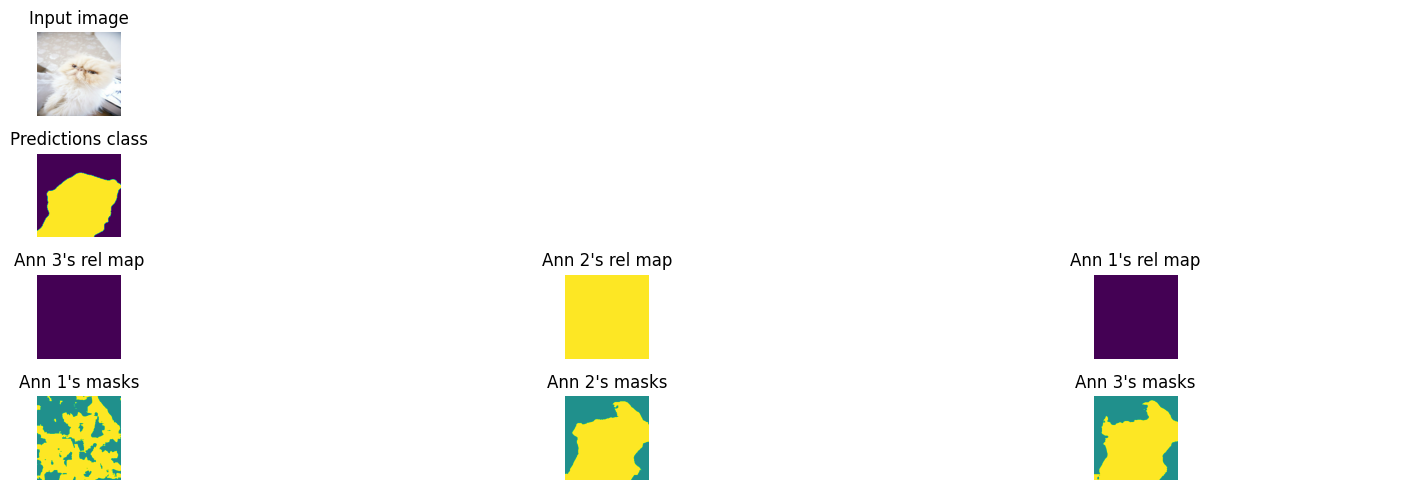

Train loss: 0.37495 | Time: 9m 7s | Val loss: 0.38478
Train_DICE_avg: 0.92676 | Train_Jaccard_avg: 0.87055 | Train_Sensitivity_avg: 0.94753 | Train_Specificity_avg: 0.92008 
Class 0 - Train_DICE: 0.93222 | Train_Jaccard: 0.88018 | Train_Sensitivity: 0.95411 | Train_Specificity: 0.90529 
Class 1 - Train_DICE: 0.92130 | Train_Jaccard: 0.86092 | Train_Sensitivity: 0.94094 | Train_Specificity: 0.93487 
Val_DICE_avg: 0.94893 | Val_Jaccard_avg: 0.90766 | Val_Sensitivity_avg: 0.95197 | Val_Specificity_avg: 0.95449 
Class 0 - Val_DICE: 0.95879 | Val_Jaccard: 0.92372 | Val_Sensitivity: 0.96394 | Val_Specificity: 0.94309 
Class 1 - Val_DICE: 0.93907 | Val_Jaccard: 0.89160 | Val_Sensitivity: 0.93999 | Val_Specificity: 0.96589 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


Train loss: 0.37475 | Time: 9m 33s | Val loss: 0.38448
Train_DICE_avg: 0.92776 | Train_Jaccard_avg: 0.87186 | Train_Sensitivity_avg: 0.94814 | Train_Specificity_avg: 0.92140 
Class 0 - Train_DICE: 0.93230 | Train_Jaccard: 0.88036 | Train_Sensitivity: 0.95272 | Train_Specificity: 0.90768 
Class 1 - Train_DICE: 0.92322 | Train_Jaccard: 0.86337 | Train_Sensitivity: 0.94355 | Train_Specificity: 0.93511 
Val_DICE_avg: 0.94934 | Val_Jaccard_avg: 0.90893 | Val_Sensitivity_avg: 0.95172 | Val_Specificity_avg: 0.95428 
Class 0 - Val_DICE: 0.95840 | Val_Jaccard: 0.92366 | Val_Sensitivity: 0.96151 | Val_Specificity: 0.94505 
Class 1 - Val_DICE: 0.94028 | Val_Jaccard: 0.89421 | Val_Sensitivity: 0.94193 | Val_Specificity: 0.96352 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Train loss: 0.37405 | Time: 9m 58s | Val loss: 0.38466
Train_DICE_avg: 0.93155 | Train_Jaccard_avg: 0.87794 | Train_Sensitivity_avg: 0.95059 | Train_Specificity_avg: 0.92492 
Class 0 - Train_DICE: 0.93710 | Train_Jaccard: 0.88781 | Train_Sensitivity: 0.95821 | Train_Specificity: 0.90847 
Class 1 - Train_DICE: 0.92600 | Train_Jaccard: 0.86807 | Train_Sensitivity: 0.94297 | Train_Specificity: 0.94138 
Val_DICE_avg: 0.94830 | Val_Jaccard_avg: 0.90716 | Val_Sensitivity_avg: 0.95077 | Val_Specificity_avg: 0.95330 
Class 0 - Val_DICE: 0.95816 | Val_Jaccard: 0.92302 | Val_Sensitivity: 0.96150 | Val_Specificity: 0.94304 
Class 1 - Val_DICE: 0.93844 | Val_Jaccard: 0.89130 | Val_Sensitivity: 0.94004 | Val_Specificity: 0.96356 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Train loss: 0.37374 | Time: 10m 23s | Val loss: 0.38449
Train_DICE_avg: 0.93038 | Train_Jaccard_avg: 0.87634 | Train_Sensitivity_avg: 0.95156 | Train_Specificity_avg: 0.92368 
Class 0 - Train_DICE: 0.93703 | Train_Jaccard: 0.88818 | Train_Sensitivity: 0.95798 | Train_Specificity: 0.91004 
Class 1 - Train_DICE: 0.92373 | Train_Jaccard: 0.86451 | Train_Sensitivity: 0.94515 | Train_Specificity: 0.93732 
Val_DICE_avg: 0.94988 | Val_Jaccard_avg: 0.90936 | Val_Sensitivity_avg: 0.95300 | Val_Specificity_avg: 0.95551 
Class 0 - Val_DICE: 0.95986 | Val_Jaccard: 0.92557 | Val_Sensitivity: 0.96330 | Val_Specificity: 0.94569 
Class 1 - Val_DICE: 0.93990 | Val_Jaccard: 0.89316 | Val_Sensitivity: 0.94271 | Val_Specificity: 0.96533 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Train loss: 0.37338 | Time: 10m 48s | Val loss: 0.38427
Train_DICE_avg: 0.93387 | Train_Jaccard_avg: 0.88153 | Train_Sensitivity_avg: 0.95257 | Train_Specificity_avg: 0.92859 
Class 0 - Train_DICE: 0.93957 | Train_Jaccard: 0.89157 | Train_Sensitivity: 0.95949 | Train_Specificity: 0.91452 
Class 1 - Train_DICE: 0.92816 | Train_Jaccard: 0.87150 | Train_Sensitivity: 0.94565 | Train_Specificity: 0.94266 
Val_DICE_avg: 0.94862 | Val_Jaccard_avg: 0.90747 | Val_Sensitivity_avg: 0.95116 | Val_Specificity_avg: 0.95371 
Class 0 - Val_DICE: 0.95847 | Val_Jaccard: 0.92347 | Val_Sensitivity: 0.96562 | Val_Specificity: 0.93984 
Class 1 - Val_DICE: 0.93877 | Val_Jaccard: 0.89146 | Val_Sensitivity: 0.93669 | Val_Specificity: 0.96759 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


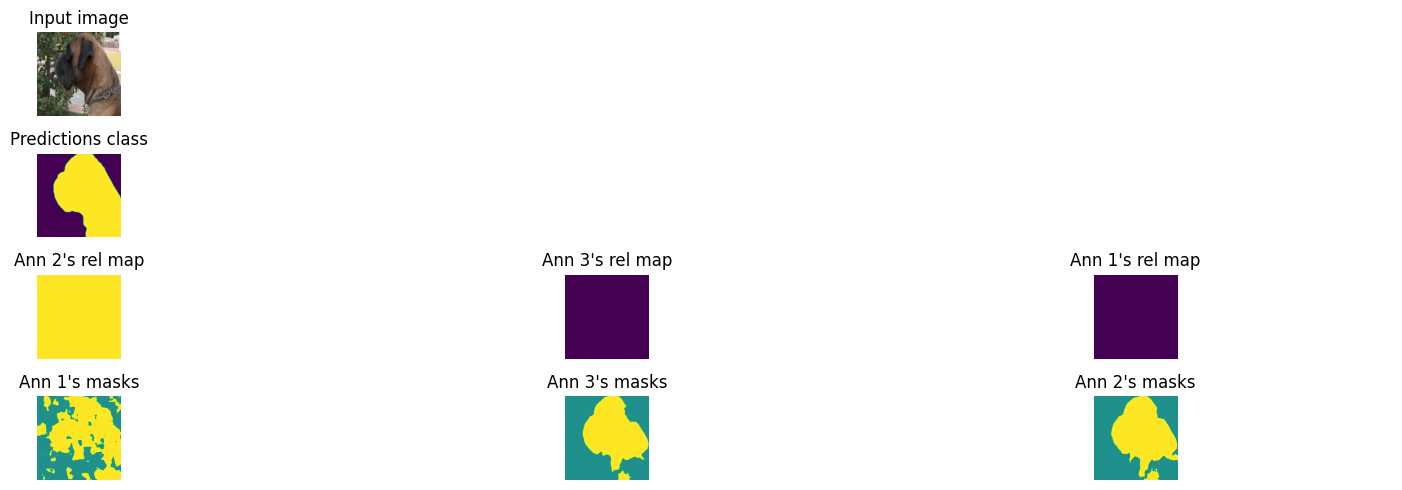

Train loss: 0.37319 | Time: 11m 14s | Val loss: 0.38413
Train_DICE_avg: 0.93395 | Train_Jaccard_avg: 0.88202 | Train_Sensitivity_avg: 0.95245 | Train_Specificity_avg: 0.92865 
Class 0 - Train_DICE: 0.94117 | Train_Jaccard: 0.89448 | Train_Sensitivity: 0.95711 | Train_Specificity: 0.91969 
Class 1 - Train_DICE: 0.92674 | Train_Jaccard: 0.86957 | Train_Sensitivity: 0.94778 | Train_Specificity: 0.93760 
Val_DICE_avg: 0.95018 | Val_Jaccard_avg: 0.90994 | Val_Sensitivity_avg: 0.95401 | Val_Specificity_avg: 0.95648 
Class 0 - Val_DICE: 0.95974 | Val_Jaccard: 0.92538 | Val_Sensitivity: 0.96023 | Val_Specificity: 0.95051 
Class 1 - Val_DICE: 0.94061 | Val_Jaccard: 0.89450 | Val_Sensitivity: 0.94780 | Val_Specificity: 0.96244 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


Train loss: 0.37305 | Time: 11m 40s | Val loss: 0.38433
Train_DICE_avg: 0.93276 | Train_Jaccard_avg: 0.88075 | Train_Sensitivity_avg: 0.95247 | Train_Specificity_avg: 0.92808 
Class 0 - Train_DICE: 0.94011 | Train_Jaccard: 0.89324 | Train_Sensitivity: 0.95859 | Train_Specificity: 0.91918 
Class 1 - Train_DICE: 0.92541 | Train_Jaccard: 0.86826 | Train_Sensitivity: 0.94636 | Train_Specificity: 0.93698 
Val_DICE_avg: 0.94966 | Val_Jaccard_avg: 0.90905 | Val_Sensitivity_avg: 0.95031 | Val_Specificity_avg: 0.95293 
Class 0 - Val_DICE: 0.96024 | Val_Jaccard: 0.92620 | Val_Sensitivity: 0.96931 | Val_Specificity: 0.93472 
Class 1 - Val_DICE: 0.93909 | Val_Jaccard: 0.89189 | Val_Sensitivity: 0.93132 | Val_Specificity: 0.97113 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


Train loss: 0.37282 | Time: 12m 5s | Val loss: 0.38413
Train_DICE_avg: 0.93372 | Train_Jaccard_avg: 0.88153 | Train_Sensitivity_avg: 0.95296 | Train_Specificity_avg: 0.92682 
Class 0 - Train_DICE: 0.93900 | Train_Jaccard: 0.89062 | Train_Sensitivity: 0.95822 | Train_Specificity: 0.91309 
Class 1 - Train_DICE: 0.92845 | Train_Jaccard: 0.87244 | Train_Sensitivity: 0.94771 | Train_Specificity: 0.94056 
Val_DICE_avg: 0.95041 | Val_Jaccard_avg: 0.91034 | Val_Sensitivity_avg: 0.95280 | Val_Specificity_avg: 0.95535 
Class 0 - Val_DICE: 0.96035 | Val_Jaccard: 0.92642 | Val_Sensitivity: 0.96282 | Val_Specificity: 0.94587 
Class 1 - Val_DICE: 0.94046 | Val_Jaccard: 0.89425 | Val_Sensitivity: 0.94278 | Val_Specificity: 0.96483 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 8/8 [00:04<00:00,  1.65it/s]


Train loss: 0.37256 | Time: 12m 31s | Val loss: 0.38392
Train_DICE_avg: 0.93404 | Train_Jaccard_avg: 0.88210 | Train_Sensitivity_avg: 0.95327 | Train_Specificity_avg: 0.92786 
Class 0 - Train_DICE: 0.94074 | Train_Jaccard: 0.89393 | Train_Sensitivity: 0.95974 | Train_Specificity: 0.91651 
Class 1 - Train_DICE: 0.92733 | Train_Jaccard: 0.87028 | Train_Sensitivity: 0.94680 | Train_Specificity: 0.93921 
Val_DICE_avg: 0.94995 | Val_Jaccard_avg: 0.91003 | Val_Sensitivity_avg: 0.95274 | Val_Specificity_avg: 0.95523 
Class 0 - Val_DICE: 0.95959 | Val_Jaccard: 0.92531 | Val_Sensitivity: 0.96268 | Val_Specificity: 0.94563 
Class 1 - Val_DICE: 0.94031 | Val_Jaccard: 0.89475 | Val_Sensitivity: 0.94280 | Val_Specificity: 0.96482 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Train loss: 0.37253 | Time: 12m 56s | Val loss: 0.38434
Train_DICE_avg: 0.93376 | Train_Jaccard_avg: 0.88170 | Train_Sensitivity_avg: 0.95349 | Train_Specificity_avg: 0.92741 
Class 0 - Train_DICE: 0.94004 | Train_Jaccard: 0.89275 | Train_Sensitivity: 0.95975 | Train_Specificity: 0.91357 
Class 1 - Train_DICE: 0.92748 | Train_Jaccard: 0.87065 | Train_Sensitivity: 0.94723 | Train_Specificity: 0.94126 
Val_DICE_avg: 0.94929 | Val_Jaccard_avg: 0.90850 | Val_Sensitivity_avg: 0.95022 | Val_Specificity_avg: 0.95287 
Class 0 - Val_DICE: 0.95990 | Val_Jaccard: 0.92559 | Val_Sensitivity: 0.96591 | Val_Specificity: 0.93808 
Class 1 - Val_DICE: 0.93867 | Val_Jaccard: 0.89140 | Val_Sensitivity: 0.93453 | Val_Specificity: 0.96767 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


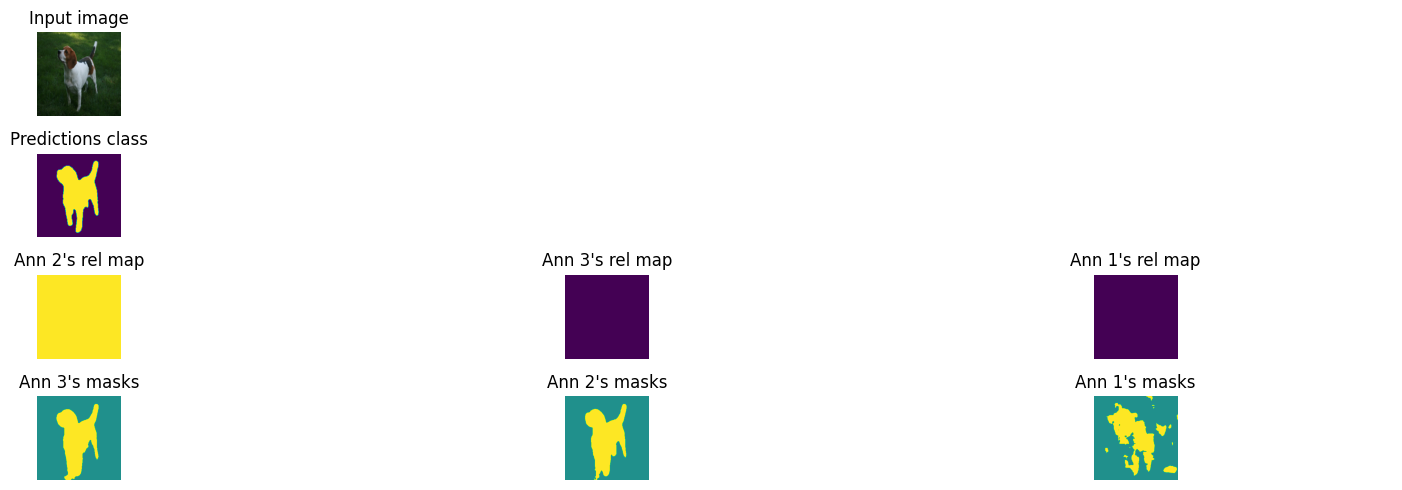

Train loss: 0.37244 | Time: 13m 22s | Val loss: 0.38385
Train_DICE_avg: 0.93410 | Train_Jaccard_avg: 0.88216 | Train_Sensitivity_avg: 0.95371 | Train_Specificity_avg: 0.92721 
Class 0 - Train_DICE: 0.94074 | Train_Jaccard: 0.89385 | Train_Sensitivity: 0.96065 | Train_Specificity: 0.91546 
Class 1 - Train_DICE: 0.92747 | Train_Jaccard: 0.87047 | Train_Sensitivity: 0.94677 | Train_Specificity: 0.93896 
Val_DICE_avg: 0.94969 | Val_Jaccard_avg: 0.90946 | Val_Sensitivity_avg: 0.95238 | Val_Specificity_avg: 0.95489 
Class 0 - Val_DICE: 0.95949 | Val_Jaccard: 0.92514 | Val_Sensitivity: 0.96237 | Val_Specificity: 0.94532 
Class 1 - Val_DICE: 0.93988 | Val_Jaccard: 0.89378 | Val_Sensitivity: 0.94239 | Val_Specificity: 0.96446 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 8/8 [00:04<00:00,  1.66it/s]


Train loss: 0.37238 | Time: 13m 47s | Val loss: 0.38374
Train_DICE_avg: 0.93379 | Train_Jaccard_avg: 0.88199 | Train_Sensitivity_avg: 0.95422 | Train_Specificity_avg: 0.92854 
Class 0 - Train_DICE: 0.94102 | Train_Jaccard: 0.89478 | Train_Sensitivity: 0.96067 | Train_Specificity: 0.91826 
Class 1 - Train_DICE: 0.92657 | Train_Jaccard: 0.86920 | Train_Sensitivity: 0.94776 | Train_Specificity: 0.93881 
Val_DICE_avg: 0.95006 | Val_Jaccard_avg: 0.91006 | Val_Sensitivity_avg: 0.95337 | Val_Specificity_avg: 0.95591 
Class 0 - Val_DICE: 0.95923 | Val_Jaccard: 0.92488 | Val_Sensitivity: 0.96134 | Val_Specificity: 0.94842 
Class 1 - Val_DICE: 0.94089 | Val_Jaccard: 0.89523 | Val_Sensitivity: 0.94540 | Val_Specificity: 0.96340 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Train loss: 0.37218 | Time: 14m 13s | Val loss: 0.38376
Train_DICE_avg: 0.93398 | Train_Jaccard_avg: 0.88236 | Train_Sensitivity_avg: 0.95363 | Train_Specificity_avg: 0.92694 
Class 0 - Train_DICE: 0.93714 | Train_Jaccard: 0.88853 | Train_Sensitivity: 0.96072 | Train_Specificity: 0.90981 
Class 1 - Train_DICE: 0.93082 | Train_Jaccard: 0.87619 | Train_Sensitivity: 0.94654 | Train_Specificity: 0.94406 
Val_DICE_avg: 0.95094 | Val_Jaccard_avg: 0.91108 | Val_Sensitivity_avg: 0.95307 | Val_Specificity_avg: 0.95566 
Class 0 - Val_DICE: 0.96059 | Val_Jaccard: 0.92681 | Val_Sensitivity: 0.96530 | Val_Specificity: 0.94415 
Class 1 - Val_DICE: 0.94129 | Val_Jaccard: 0.89536 | Val_Sensitivity: 0.94084 | Val_Specificity: 0.96717 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Train loss: 0.37167 | Time: 14m 39s | Val loss: 0.38356
Train_DICE_avg: 0.93566 | Train_Jaccard_avg: 0.88502 | Train_Sensitivity_avg: 0.95524 | Train_Specificity_avg: 0.92912 
Class 0 - Train_DICE: 0.94204 | Train_Jaccard: 0.89613 | Train_Sensitivity: 0.96004 | Train_Specificity: 0.91935 
Class 1 - Train_DICE: 0.92929 | Train_Jaccard: 0.87391 | Train_Sensitivity: 0.95045 | Train_Specificity: 0.93890 
Val_DICE_avg: 0.95033 | Val_Jaccard_avg: 0.91009 | Val_Sensitivity_avg: 0.95426 | Val_Specificity_avg: 0.95676 
Class 0 - Val_DICE: 0.95961 | Val_Jaccard: 0.92514 | Val_Sensitivity: 0.95407 | Val_Specificity: 0.95723 
Class 1 - Val_DICE: 0.94104 | Val_Jaccard: 0.89505 | Val_Sensitivity: 0.95444 | Val_Specificity: 0.95629 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Train loss: 0.37165 | Time: 15m 4s | Val loss: 0.38369
Train_DICE_avg: 0.93642 | Train_Jaccard_avg: 0.88608 | Train_Sensitivity_avg: 0.95523 | Train_Specificity_avg: 0.92959 
Class 0 - Train_DICE: 0.94307 | Train_Jaccard: 0.89757 | Train_Sensitivity: 0.96301 | Train_Specificity: 0.91579 
Class 1 - Train_DICE: 0.92976 | Train_Jaccard: 0.87460 | Train_Sensitivity: 0.94745 | Train_Specificity: 0.94338 
Val_DICE_avg: 0.95034 | Val_Jaccard_avg: 0.91042 | Val_Sensitivity_avg: 0.95206 | Val_Specificity_avg: 0.95462 
Class 0 - Val_DICE: 0.95996 | Val_Jaccard: 0.92593 | Val_Sensitivity: 0.96527 | Val_Specificity: 0.94194 
Class 1 - Val_DICE: 0.94073 | Val_Jaccard: 0.89491 | Val_Sensitivity: 0.93885 | Val_Specificity: 0.96730 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


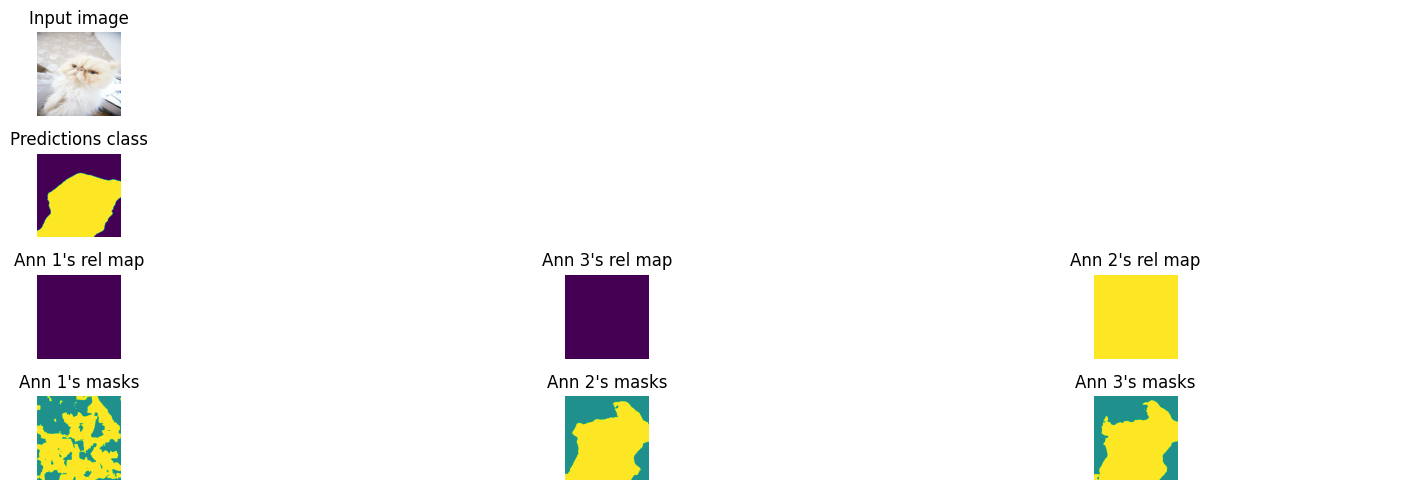

Train loss: 0.37146 | Time: 15m 30s | Val loss: 0.38358
Train_DICE_avg: 0.93786 | Train_Jaccard_avg: 0.88856 | Train_Sensitivity_avg: 0.95631 | Train_Specificity_avg: 0.93065 
Class 0 - Train_DICE: 0.94259 | Train_Jaccard: 0.89694 | Train_Sensitivity: 0.96221 | Train_Specificity: 0.91722 
Class 1 - Train_DICE: 0.93312 | Train_Jaccard: 0.88018 | Train_Sensitivity: 0.95041 | Train_Specificity: 0.94408 
Val_DICE_avg: 0.95030 | Val_Jaccard_avg: 0.91017 | Val_Sensitivity_avg: 0.95303 | Val_Specificity_avg: 0.95557 
Class 0 - Val_DICE: 0.95913 | Val_Jaccard: 0.92464 | Val_Sensitivity: 0.95764 | Val_Specificity: 0.95142 
Class 1 - Val_DICE: 0.94148 | Val_Jaccard: 0.89570 | Val_Sensitivity: 0.94841 | Val_Specificity: 0.95973 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Train loss: 0.37132 | Time: 15m 55s | Val loss: 0.38343
Train_DICE_avg: 0.93816 | Train_Jaccard_avg: 0.88898 | Train_Sensitivity_avg: 0.95600 | Train_Specificity_avg: 0.93149 
Class 0 - Train_DICE: 0.94395 | Train_Jaccard: 0.89905 | Train_Sensitivity: 0.96141 | Train_Specificity: 0.92149 
Class 1 - Train_DICE: 0.93237 | Train_Jaccard: 0.87892 | Train_Sensitivity: 0.95060 | Train_Specificity: 0.94149 
Val_DICE_avg: 0.95126 | Val_Jaccard_avg: 0.91189 | Val_Sensitivity_avg: 0.95465 | Val_Specificity_avg: 0.95718 
Class 0 - Val_DICE: 0.96025 | Val_Jaccard: 0.92647 | Val_Sensitivity: 0.96140 | Val_Specificity: 0.95086 
Class 1 - Val_DICE: 0.94228 | Val_Jaccard: 0.89731 | Val_Sensitivity: 0.94791 | Val_Specificity: 0.96350 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Train loss: 0.37122 | Time: 16m 21s | Val loss: 0.38372
Train_DICE_avg: 0.93826 | Train_Jaccard_avg: 0.88940 | Train_Sensitivity_avg: 0.95656 | Train_Specificity_avg: 0.93113 
Class 0 - Train_DICE: 0.94178 | Train_Jaccard: 0.89604 | Train_Sensitivity: 0.96234 | Train_Specificity: 0.91548 
Class 1 - Train_DICE: 0.93475 | Train_Jaccard: 0.88275 | Train_Sensitivity: 0.95079 | Train_Specificity: 0.94678 
Val_DICE_avg: 0.95110 | Val_Jaccard_avg: 0.91168 | Val_Sensitivity_avg: 0.95270 | Val_Specificity_avg: 0.95528 
Class 0 - Val_DICE: 0.96055 | Val_Jaccard: 0.92698 | Val_Sensitivity: 0.96253 | Val_Specificity: 0.94605 
Class 1 - Val_DICE: 0.94166 | Val_Jaccard: 0.89638 | Val_Sensitivity: 0.94288 | Val_Specificity: 0.96452 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Train loss: 0.37108 | Time: 16m 46s | Val loss: 0.38372
Train_DICE_avg: 0.93737 | Train_Jaccard_avg: 0.88785 | Train_Sensitivity_avg: 0.95713 | Train_Specificity_avg: 0.92893 
Class 0 - Train_DICE: 0.94309 | Train_Jaccard: 0.89789 | Train_Sensitivity: 0.96398 | Train_Specificity: 0.91371 
Class 1 - Train_DICE: 0.93164 | Train_Jaccard: 0.87782 | Train_Sensitivity: 0.95028 | Train_Specificity: 0.94416 
Val_DICE_avg: 0.95053 | Val_Jaccard_avg: 0.91060 | Val_Sensitivity_avg: 0.95269 | Val_Specificity_avg: 0.95521 
Class 0 - Val_DICE: 0.95957 | Val_Jaccard: 0.92520 | Val_Sensitivity: 0.96048 | Val_Specificity: 0.94777 
Class 1 - Val_DICE: 0.94149 | Val_Jaccard: 0.89600 | Val_Sensitivity: 0.94491 | Val_Specificity: 0.96266 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Train loss: 0.37107 | Time: 17m 11s | Val loss: 0.38352
Train_DICE_avg: 0.93678 | Train_Jaccard_avg: 0.88643 | Train_Sensitivity_avg: 0.95652 | Train_Specificity_avg: 0.92917 
Class 0 - Train_DICE: 0.94363 | Train_Jaccard: 0.89806 | Train_Sensitivity: 0.96121 | Train_Specificity: 0.91797 
Class 1 - Train_DICE: 0.92994 | Train_Jaccard: 0.87480 | Train_Sensitivity: 0.95184 | Train_Specificity: 0.94036 
Val_DICE_avg: 0.95227 | Val_Jaccard_avg: 0.91333 | Val_Sensitivity_avg: 0.95389 | Val_Specificity_avg: 0.95646 
Class 0 - Val_DICE: 0.96127 | Val_Jaccard: 0.92812 | Val_Sensitivity: 0.96551 | Val_Specificity: 0.94540 
Class 1 - Val_DICE: 0.94327 | Val_Jaccard: 0.89854 | Val_Sensitivity: 0.94228 | Val_Specificity: 0.96753 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


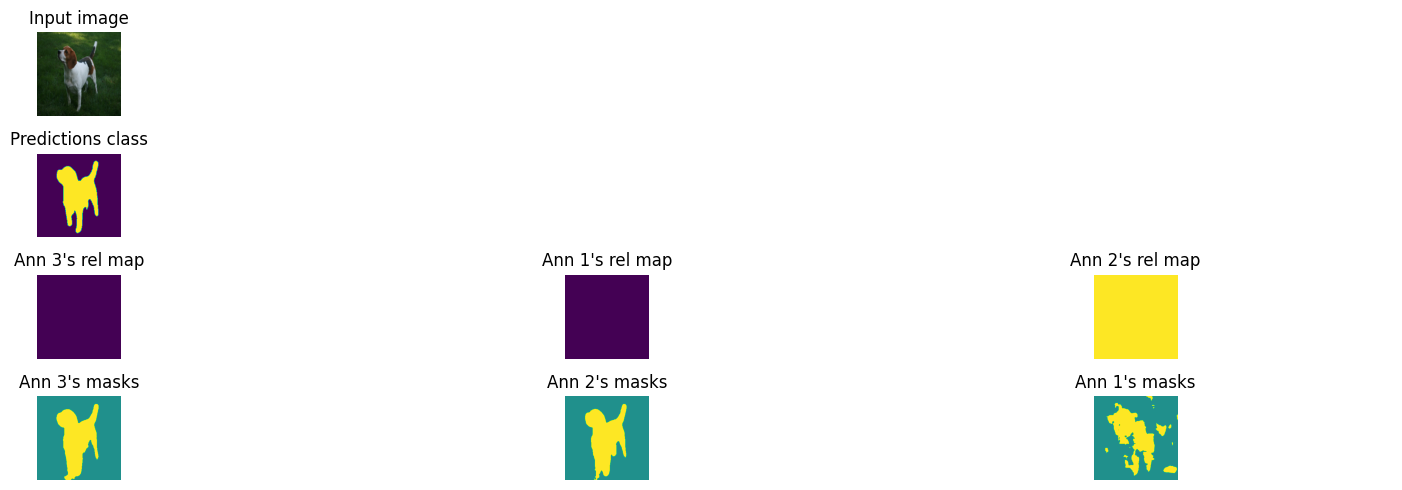

Train loss: 0.37082 | Time: 17m 38s | Val loss: 0.38343
Train_DICE_avg: 0.94009 | Train_Jaccard_avg: 0.89275 | Train_Sensitivity_avg: 0.95755 | Train_Specificity_avg: 0.93110 
Class 0 - Train_DICE: 0.94166 | Train_Jaccard: 0.89592 | Train_Sensitivity: 0.96324 | Train_Specificity: 0.91245 
Class 1 - Train_DICE: 0.93852 | Train_Jaccard: 0.88957 | Train_Sensitivity: 0.95186 | Train_Specificity: 0.94975 
Val_DICE_avg: 0.95177 | Val_Jaccard_avg: 0.91244 | Val_Sensitivity_avg: 0.95428 | Val_Specificity_avg: 0.95684 
Class 0 - Val_DICE: 0.96057 | Val_Jaccard: 0.92692 | Val_Sensitivity: 0.96076 | Val_Specificity: 0.95087 
Class 1 - Val_DICE: 0.94297 | Val_Jaccard: 0.89795 | Val_Sensitivity: 0.94780 | Val_Specificity: 0.96282 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 8/8 [00:04<00:00,  1.76it/s]


Train loss: 0.37075 | Time: 18m 3s | Val loss: 0.38348
Train_DICE_avg: 0.94071 | Train_Jaccard_avg: 0.89293 | Train_Sensitivity_avg: 0.95872 | Train_Specificity_avg: 0.93252 
Class 0 - Train_DICE: 0.94690 | Train_Jaccard: 0.90366 | Train_Sensitivity: 0.96505 | Train_Specificity: 0.92012 
Class 1 - Train_DICE: 0.93452 | Train_Jaccard: 0.88220 | Train_Sensitivity: 0.95239 | Train_Specificity: 0.94492 
Val_DICE_avg: 0.95198 | Val_Jaccard_avg: 0.91300 | Val_Sensitivity_avg: 0.95431 | Val_Specificity_avg: 0.95684 
Class 0 - Val_DICE: 0.96065 | Val_Jaccard: 0.92720 | Val_Sensitivity: 0.96170 | Val_Specificity: 0.94989 
Class 1 - Val_DICE: 0.94331 | Val_Jaccard: 0.89880 | Val_Sensitivity: 0.94693 | Val_Specificity: 0.96380 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


Train loss: 0.37063 | Time: 18m 29s | Val loss: 0.38347
Train_DICE_avg: 0.94038 | Train_Jaccard_avg: 0.89253 | Train_Sensitivity_avg: 0.95866 | Train_Specificity_avg: 0.93235 
Class 0 - Train_DICE: 0.94536 | Train_Jaccard: 0.90125 | Train_Sensitivity: 0.96383 | Train_Specificity: 0.91945 
Class 1 - Train_DICE: 0.93539 | Train_Jaccard: 0.88381 | Train_Sensitivity: 0.95349 | Train_Specificity: 0.94524 
Val_DICE_avg: 0.95267 | Val_Jaccard_avg: 0.91405 | Val_Sensitivity_avg: 0.95466 | Val_Specificity_avg: 0.95721 
Class 0 - Val_DICE: 0.96154 | Val_Jaccard: 0.92852 | Val_Sensitivity: 0.96190 | Val_Specificity: 0.95044 
Class 1 - Val_DICE: 0.94381 | Val_Jaccard: 0.89959 | Val_Sensitivity: 0.94742 | Val_Specificity: 0.96399 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 8/8 [00:04<00:00,  1.73it/s]


Train loss: 0.37057 | Time: 18m 54s | Val loss: 0.38351
Train_DICE_avg: 0.94044 | Train_Jaccard_avg: 0.89290 | Train_Sensitivity_avg: 0.95840 | Train_Specificity_avg: 0.93340 
Class 0 - Train_DICE: 0.94653 | Train_Jaccard: 0.90346 | Train_Sensitivity: 0.96274 | Train_Specificity: 0.92404 
Class 1 - Train_DICE: 0.93435 | Train_Jaccard: 0.88233 | Train_Sensitivity: 0.95405 | Train_Specificity: 0.94277 
Val_DICE_avg: 0.95223 | Val_Jaccard_avg: 0.91323 | Val_Sensitivity_avg: 0.95383 | Val_Specificity_avg: 0.95641 
Class 0 - Val_DICE: 0.96101 | Val_Jaccard: 0.92773 | Val_Sensitivity: 0.96296 | Val_Specificity: 0.94785 
Class 1 - Val_DICE: 0.94345 | Val_Jaccard: 0.89873 | Val_Sensitivity: 0.94470 | Val_Specificity: 0.96496 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 8/8 [00:04<00:00,  1.71it/s]


Train loss: 0.37041 | Time: 19m 19s | Val loss: 0.38336
Train_DICE_avg: 0.94187 | Train_Jaccard_avg: 0.89519 | Train_Sensitivity_avg: 0.95882 | Train_Specificity_avg: 0.93325 
Class 0 - Train_DICE: 0.94464 | Train_Jaccard: 0.90048 | Train_Sensitivity: 0.96428 | Train_Specificity: 0.91839 
Class 1 - Train_DICE: 0.93910 | Train_Jaccard: 0.88990 | Train_Sensitivity: 0.95336 | Train_Specificity: 0.94812 
Val_DICE_avg: 0.95237 | Val_Jaccard_avg: 0.91358 | Val_Sensitivity_avg: 0.95410 | Val_Specificity_avg: 0.95669 
Class 0 - Val_DICE: 0.96147 | Val_Jaccard: 0.92847 | Val_Sensitivity: 0.96510 | Val_Specificity: 0.94630 
Class 1 - Val_DICE: 0.94327 | Val_Jaccard: 0.89869 | Val_Sensitivity: 0.94309 | Val_Specificity: 0.96707 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


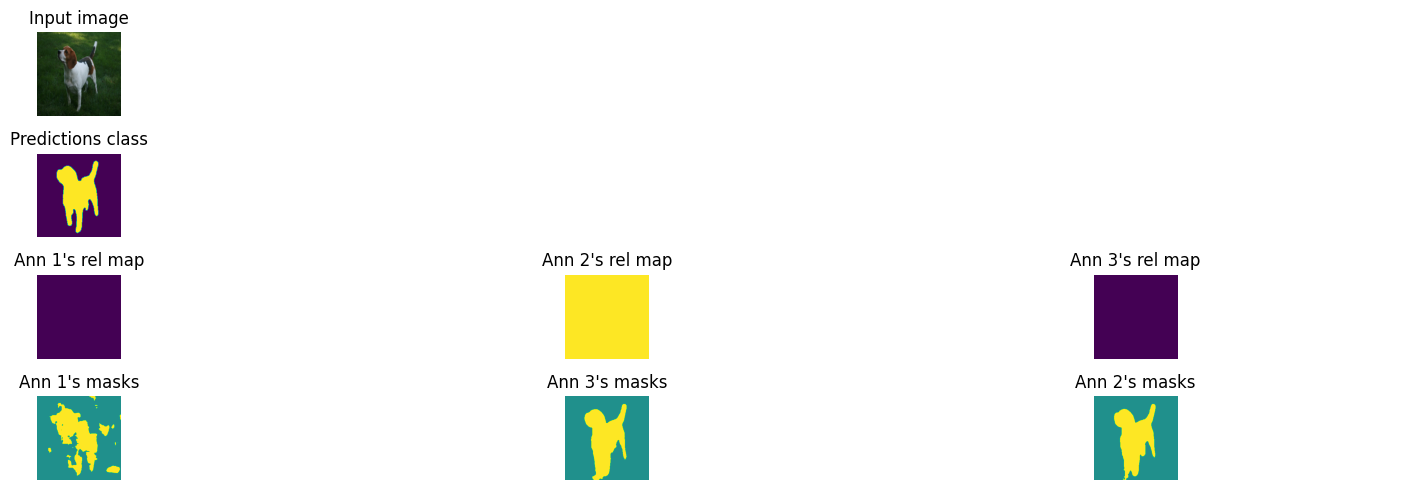

Train loss: 0.37030 | Time: 19m 45s | Val loss: 0.38339
Train_DICE_avg: 0.94108 | Train_Jaccard_avg: 0.89385 | Train_Sensitivity_avg: 0.95988 | Train_Specificity_avg: 0.93310 
Class 0 - Train_DICE: 0.94770 | Train_Jaccard: 0.90527 | Train_Sensitivity: 0.96500 | Train_Specificity: 0.92435 
Class 1 - Train_DICE: 0.93445 | Train_Jaccard: 0.88244 | Train_Sensitivity: 0.95476 | Train_Specificity: 0.94185 
Val_DICE_avg: 0.95249 | Val_Jaccard_avg: 0.91385 | Val_Sensitivity_avg: 0.95530 | Val_Specificity_avg: 0.95785 
Class 0 - Val_DICE: 0.96132 | Val_Jaccard: 0.92828 | Val_Sensitivity: 0.96341 | Val_Specificity: 0.95024 
Class 1 - Val_DICE: 0.94366 | Val_Jaccard: 0.89942 | Val_Sensitivity: 0.94719 | Val_Specificity: 0.96546 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


Train loss: 0.37034 | Time: 20m 11s | Val loss: 0.38343
Train_DICE_avg: 0.94140 | Train_Jaccard_avg: 0.89425 | Train_Sensitivity_avg: 0.95974 | Train_Specificity_avg: 0.93444 
Class 0 - Train_DICE: 0.94897 | Train_Jaccard: 0.90724 | Train_Sensitivity: 0.96569 | Train_Specificity: 0.92472 
Class 1 - Train_DICE: 0.93383 | Train_Jaccard: 0.88125 | Train_Sensitivity: 0.95380 | Train_Specificity: 0.94416 
Val_DICE_avg: 0.95240 | Val_Jaccard_avg: 0.91363 | Val_Sensitivity_avg: 0.95479 | Val_Specificity_avg: 0.95736 
Class 0 - Val_DICE: 0.96123 | Val_Jaccard: 0.92807 | Val_Sensitivity: 0.96267 | Val_Specificity: 0.95003 
Class 1 - Val_DICE: 0.94357 | Val_Jaccard: 0.89919 | Val_Sensitivity: 0.94692 | Val_Specificity: 0.96469 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 8/8 [00:04<00:00,  1.68it/s]


Train loss: 0.37024 | Time: 20m 36s | Val loss: 0.38347
Train_DICE_avg: 0.94103 | Train_Jaccard_avg: 0.89404 | Train_Sensitivity_avg: 0.95946 | Train_Specificity_avg: 0.93271 
Class 0 - Train_DICE: 0.94728 | Train_Jaccard: 0.90494 | Train_Sensitivity: 0.96532 | Train_Specificity: 0.92245 
Class 1 - Train_DICE: 0.93478 | Train_Jaccard: 0.88314 | Train_Sensitivity: 0.95360 | Train_Specificity: 0.94298 
Val_DICE_avg: 0.95210 | Val_Jaccard_avg: 0.91301 | Val_Sensitivity_avg: 0.95481 | Val_Specificity_avg: 0.95736 
Class 0 - Val_DICE: 0.96079 | Val_Jaccard: 0.92729 | Val_Sensitivity: 0.95882 | Val_Specificity: 0.95377 
Class 1 - Val_DICE: 0.94342 | Val_Jaccard: 0.89872 | Val_Sensitivity: 0.95080 | Val_Specificity: 0.96094 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Train loss: 0.37034 | Time: 21m 2s | Val loss: 0.38339
Train_DICE_avg: 0.93982 | Train_Jaccard_avg: 0.89185 | Train_Sensitivity_avg: 0.95907 | Train_Specificity_avg: 0.93161 
Class 0 - Train_DICE: 0.94583 | Train_Jaccard: 0.90254 | Train_Sensitivity: 0.96371 | Train_Specificity: 0.92256 
Class 1 - Train_DICE: 0.93381 | Train_Jaccard: 0.88115 | Train_Sensitivity: 0.95444 | Train_Specificity: 0.94065 
Val_DICE_avg: 0.95262 | Val_Jaccard_avg: 0.91385 | Val_Sensitivity_avg: 0.95482 | Val_Specificity_avg: 0.95742 
Class 0 - Val_DICE: 0.96157 | Val_Jaccard: 0.92858 | Val_Sensitivity: 0.96401 | Val_Specificity: 0.94886 
Class 1 - Val_DICE: 0.94367 | Val_Jaccard: 0.89911 | Val_Sensitivity: 0.94564 | Val_Specificity: 0.96597 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Train loss: 0.37027 | Time: 21m 27s | Val loss: 0.38352
Train_DICE_avg: 0.94245 | Train_Jaccard_avg: 0.89638 | Train_Sensitivity_avg: 0.95906 | Train_Specificity_avg: 0.93558 
Class 0 - Train_DICE: 0.94792 | Train_Jaccard: 0.90604 | Train_Sensitivity: 0.96450 | Train_Specificity: 0.92559 
Class 1 - Train_DICE: 0.93698 | Train_Jaccard: 0.88672 | Train_Sensitivity: 0.95361 | Train_Specificity: 0.94556 
Val_DICE_avg: 0.95258 | Val_Jaccard_avg: 0.91382 | Val_Sensitivity_avg: 0.95468 | Val_Specificity_avg: 0.95727 
Class 0 - Val_DICE: 0.96160 | Val_Jaccard: 0.92868 | Val_Sensitivity: 0.96300 | Val_Specificity: 0.94953 
Class 1 - Val_DICE: 0.94356 | Val_Jaccard: 0.89896 | Val_Sensitivity: 0.94635 | Val_Specificity: 0.96501 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 8/8 [00:04<00:00,  1.69it/s]


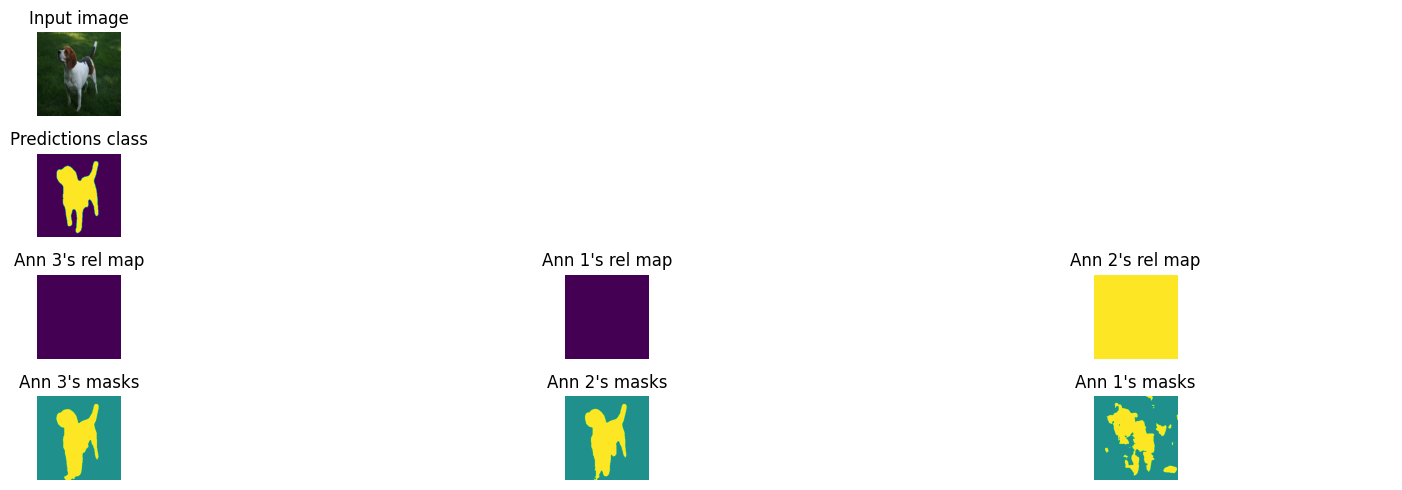

Train loss: 0.37010 | Time: 21m 53s | Val loss: 0.38337
Train_DICE_avg: 0.94087 | Train_Jaccard_avg: 0.89417 | Train_Sensitivity_avg: 0.95966 | Train_Specificity_avg: 0.93275 
Class 0 - Train_DICE: 0.94516 | Train_Jaccard: 0.90180 | Train_Sensitivity: 0.96459 | Train_Specificity: 0.91963 
Class 1 - Train_DICE: 0.93657 | Train_Jaccard: 0.88655 | Train_Sensitivity: 0.95473 | Train_Specificity: 0.94587 
Val_DICE_avg: 0.95289 | Val_Jaccard_avg: 0.91451 | Val_Sensitivity_avg: 0.95544 | Val_Specificity_avg: 0.95800 
Class 0 - Val_DICE: 0.96184 | Val_Jaccard: 0.92915 | Val_Sensitivity: 0.96437 | Val_Specificity: 0.94959 
Class 1 - Val_DICE: 0.94393 | Val_Jaccard: 0.89987 | Val_Sensitivity: 0.94652 | Val_Specificity: 0.96641 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Train loss: 0.37010 | Time: 22m 18s | Val loss: 0.38337
Train_DICE_avg: 0.94275 | Train_Jaccard_avg: 0.89691 | Train_Sensitivity_avg: 0.96077 | Train_Specificity_avg: 0.93470 
Class 0 - Train_DICE: 0.94604 | Train_Jaccard: 0.90317 | Train_Sensitivity: 0.96552 | Train_Specificity: 0.92071 
Class 1 - Train_DICE: 0.93946 | Train_Jaccard: 0.89065 | Train_Sensitivity: 0.95601 | Train_Specificity: 0.94868 
Val_DICE_avg: 0.95237 | Val_Jaccard_avg: 0.91355 | Val_Sensitivity_avg: 0.95450 | Val_Specificity_avg: 0.95709 
Class 0 - Val_DICE: 0.96147 | Val_Jaccard: 0.92846 | Val_Sensitivity: 0.96590 | Val_Specificity: 0.94634 
Class 1 - Val_DICE: 0.94328 | Val_Jaccard: 0.89865 | Val_Sensitivity: 0.94310 | Val_Specificity: 0.96784 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 8/8 [00:04<00:00,  1.75it/s]


Train loss: 0.36997 | Time: 22m 44s | Val loss: 0.38338
Train_DICE_avg: 0.94171 | Train_Jaccard_avg: 0.89498 | Train_Sensitivity_avg: 0.96046 | Train_Specificity_avg: 0.93301 
Class 0 - Train_DICE: 0.94818 | Train_Jaccard: 0.90626 | Train_Sensitivity: 0.96623 | Train_Specificity: 0.92124 
Class 1 - Train_DICE: 0.93524 | Train_Jaccard: 0.88369 | Train_Sensitivity: 0.95469 | Train_Specificity: 0.94478 
Val_DICE_avg: 0.95209 | Val_Jaccard_avg: 0.91307 | Val_Sensitivity_avg: 0.95493 | Val_Specificity_avg: 0.95747 
Class 0 - Val_DICE: 0.96098 | Val_Jaccard: 0.92757 | Val_Sensitivity: 0.96106 | Val_Specificity: 0.95174 
Class 1 - Val_DICE: 0.94319 | Val_Jaccard: 0.89858 | Val_Sensitivity: 0.94879 | Val_Specificity: 0.96320 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Train loss: 0.36997 | Time: 23m 9s | Val loss: 0.38335
Train_DICE_avg: 0.94171 | Train_Jaccard_avg: 0.89539 | Train_Sensitivity_avg: 0.96044 | Train_Specificity_avg: 0.93354 
Class 0 - Train_DICE: 0.94846 | Train_Jaccard: 0.90653 | Train_Sensitivity: 0.96575 | Train_Specificity: 0.92327 
Class 1 - Train_DICE: 0.93495 | Train_Jaccard: 0.88426 | Train_Sensitivity: 0.95513 | Train_Specificity: 0.94381 
Val_DICE_avg: 0.95224 | Val_Jaccard_avg: 0.91338 | Val_Sensitivity_avg: 0.95436 | Val_Specificity_avg: 0.95693 
Class 0 - Val_DICE: 0.96132 | Val_Jaccard: 0.92819 | Val_Sensitivity: 0.96398 | Val_Specificity: 0.94785 
Class 1 - Val_DICE: 0.94317 | Val_Jaccard: 0.89856 | Val_Sensitivity: 0.94474 | Val_Specificity: 0.96601 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 8/8 [00:04<00:00,  1.67it/s]


Train loss: 0.36983 | Time: 23m 34s | Val loss: 0.38331
Train_DICE_avg: 0.94227 | Train_Jaccard_avg: 0.89600 | Train_Sensitivity_avg: 0.96065 | Train_Specificity_avg: 0.93433 
Class 0 - Train_DICE: 0.94904 | Train_Jaccard: 0.90769 | Train_Sensitivity: 0.96534 | Train_Specificity: 0.92566 
Class 1 - Train_DICE: 0.93550 | Train_Jaccard: 0.88431 | Train_Sensitivity: 0.95597 | Train_Specificity: 0.94300 
Val_DICE_avg: 0.95187 | Val_Jaccard_avg: 0.91276 | Val_Sensitivity_avg: 0.95434 | Val_Specificity_avg: 0.95691 
Class 0 - Val_DICE: 0.96103 | Val_Jaccard: 0.92766 | Val_Sensitivity: 0.96140 | Val_Specificity: 0.95034 
Class 1 - Val_DICE: 0.94271 | Val_Jaccard: 0.89787 | Val_Sensitivity: 0.94727 | Val_Specificity: 0.96347 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


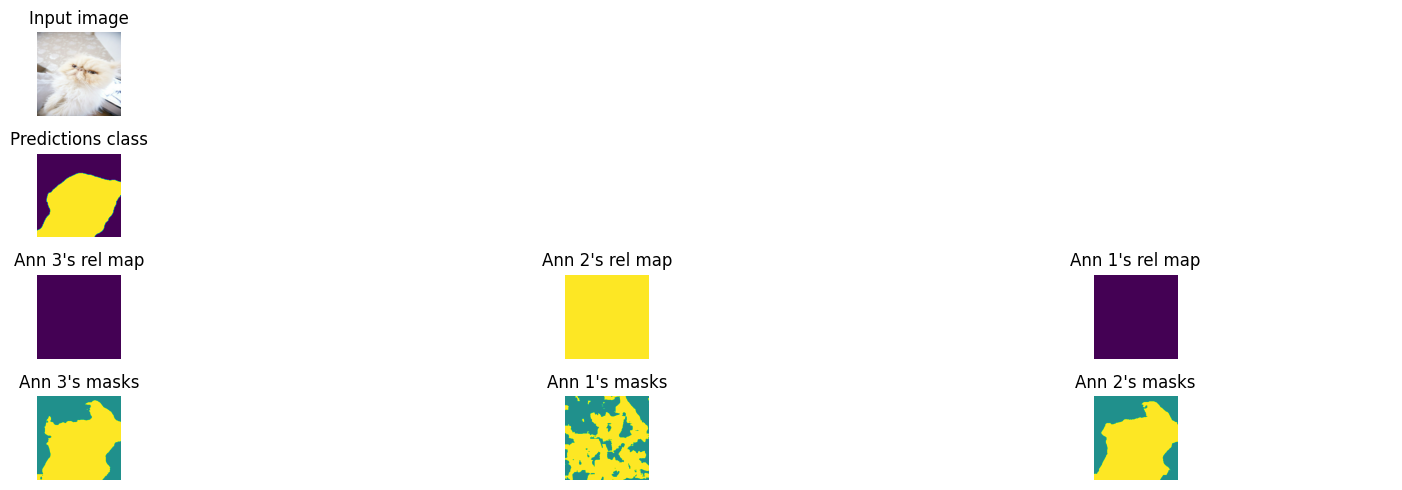

Train loss: 0.36985 | Time: 24m 0s | Val loss: 0.38328
Train_DICE_avg: 0.94223 | Train_Jaccard_avg: 0.89605 | Train_Sensitivity_avg: 0.96017 | Train_Specificity_avg: 0.93418 
Class 0 - Train_DICE: 0.94731 | Train_Jaccard: 0.90509 | Train_Sensitivity: 0.96534 | Train_Specificity: 0.92244 
Class 1 - Train_DICE: 0.93715 | Train_Jaccard: 0.88700 | Train_Sensitivity: 0.95499 | Train_Specificity: 0.94591 
Val_DICE_avg: 0.95171 | Val_Jaccard_avg: 0.91252 | Val_Sensitivity_avg: 0.95452 | Val_Specificity_avg: 0.95709 
Class 0 - Val_DICE: 0.96077 | Val_Jaccard: 0.92720 | Val_Sensitivity: 0.95991 | Val_Specificity: 0.95215 
Class 1 - Val_DICE: 0.94265 | Val_Jaccard: 0.89785 | Val_Sensitivity: 0.94912 | Val_Specificity: 0.96202 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 8/8 [00:04<00:00,  1.74it/s]


Train loss: 0.36988 | Time: 24m 25s | Val loss: 0.38329
Train_DICE_avg: 0.94213 | Train_Jaccard_avg: 0.89590 | Train_Sensitivity_avg: 0.96030 | Train_Specificity_avg: 0.93399 
Class 0 - Train_DICE: 0.94847 | Train_Jaccard: 0.90665 | Train_Sensitivity: 0.96664 | Train_Specificity: 0.92223 
Class 1 - Train_DICE: 0.93578 | Train_Jaccard: 0.88515 | Train_Sensitivity: 0.95396 | Train_Specificity: 0.94575 
Val_DICE_avg: 0.95191 | Val_Jaccard_avg: 0.91284 | Val_Sensitivity_avg: 0.95384 | Val_Specificity_avg: 0.95643 
Class 0 - Val_DICE: 0.96105 | Val_Jaccard: 0.92775 | Val_Sensitivity: 0.96479 | Val_Specificity: 0.94609 
Class 1 - Val_DICE: 0.94277 | Val_Jaccard: 0.89794 | Val_Sensitivity: 0.94288 | Val_Specificity: 0.96676 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


Train loss: 0.36979 | Time: 24m 50s | Val loss: 0.38334
Train_DICE_avg: 0.94240 | Train_Jaccard_avg: 0.89618 | Train_Sensitivity_avg: 0.96067 | Train_Specificity_avg: 0.93488 
Class 0 - Train_DICE: 0.94680 | Train_Jaccard: 0.90416 | Train_Sensitivity: 0.96567 | Train_Specificity: 0.92465 
Class 1 - Train_DICE: 0.93800 | Train_Jaccard: 0.88819 | Train_Sensitivity: 0.95567 | Train_Specificity: 0.94510 
Val_DICE_avg: 0.95200 | Val_Jaccard_avg: 0.91297 | Val_Sensitivity_avg: 0.95379 | Val_Specificity_avg: 0.95637 
Class 0 - Val_DICE: 0.96126 | Val_Jaccard: 0.92807 | Val_Sensitivity: 0.96343 | Val_Specificity: 0.94728 
Class 1 - Val_DICE: 0.94273 | Val_Jaccard: 0.89788 | Val_Sensitivity: 0.94415 | Val_Specificity: 0.96546 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Train loss: 0.36979 | Time: 25m 16s | Val loss: 0.38320
Train_DICE_avg: 0.94342 | Train_Jaccard_avg: 0.89782 | Train_Sensitivity_avg: 0.96092 | Train_Specificity_avg: 0.93516 
Class 0 - Train_DICE: 0.94940 | Train_Jaccard: 0.90812 | Train_Sensitivity: 0.96671 | Train_Specificity: 0.92357 
Class 1 - Train_DICE: 0.93743 | Train_Jaccard: 0.88752 | Train_Sensitivity: 0.95514 | Train_Specificity: 0.94675 
Val_DICE_avg: 0.95219 | Val_Jaccard_avg: 0.91319 | Val_Sensitivity_avg: 0.95431 | Val_Specificity_avg: 0.95688 
Class 0 - Val_DICE: 0.96126 | Val_Jaccard: 0.92802 | Val_Sensitivity: 0.96328 | Val_Specificity: 0.94844 
Class 1 - Val_DICE: 0.94312 | Val_Jaccard: 0.89837 | Val_Sensitivity: 0.94534 | Val_Specificity: 0.96533 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 8/8 [00:04<00:00,  1.70it/s]


Train loss: 0.36980 | Time: 25m 41s | Val loss: 0.38330
Train_DICE_avg: 0.94186 | Train_Jaccard_avg: 0.89556 | Train_Sensitivity_avg: 0.96083 | Train_Specificity_avg: 0.93477 
Class 0 - Train_DICE: 0.94711 | Train_Jaccard: 0.90513 | Train_Sensitivity: 0.96564 | Train_Specificity: 0.92443 
Class 1 - Train_DICE: 0.93660 | Train_Jaccard: 0.88599 | Train_Sensitivity: 0.95601 | Train_Specificity: 0.94511 
Val_DICE_avg: 0.95178 | Val_Jaccard_avg: 0.91251 | Val_Sensitivity_avg: 0.95430 | Val_Specificity_avg: 0.95686 
Class 0 - Val_DICE: 0.96081 | Val_Jaccard: 0.92729 | Val_Sensitivity: 0.96307 | Val_Specificity: 0.94858 
Class 1 - Val_DICE: 0.94274 | Val_Jaccard: 0.89773 | Val_Sensitivity: 0.94554 | Val_Specificity: 0.96514 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 8/8 [00:04<00:00,  1.72it/s]


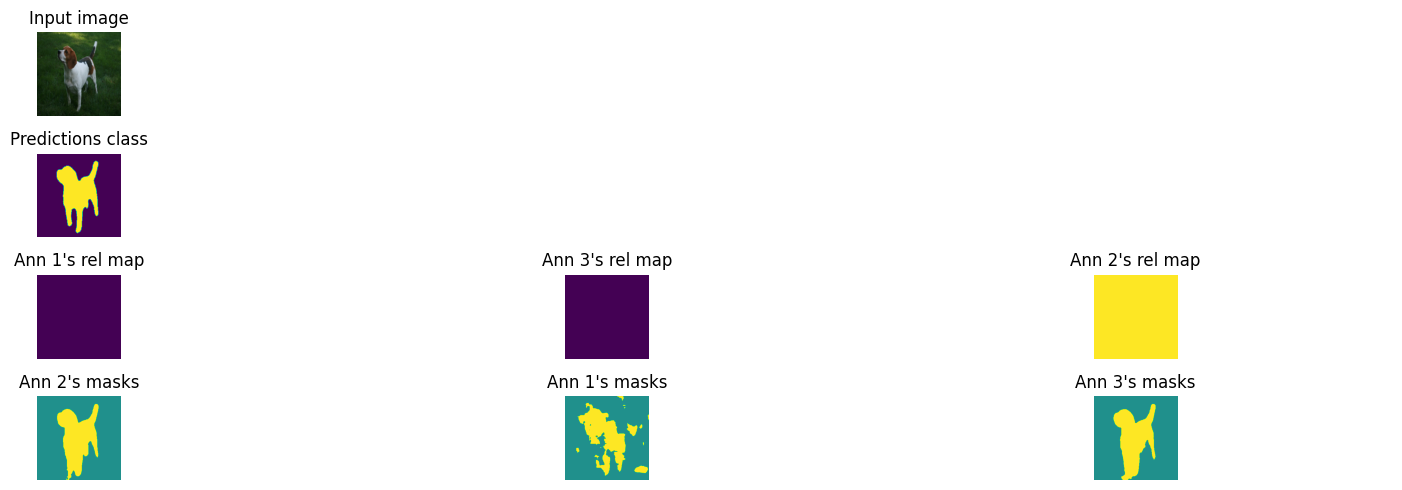

Train loss: 0.36972 | Time: 26m 7s | Val loss: 0.38326
Train_DICE_avg: 0.94180 | Train_Jaccard_avg: 0.89548 | Train_Sensitivity_avg: 0.96088 | Train_Specificity_avg: 0.93429 
Class 0 - Train_DICE: 0.94792 | Train_Jaccard: 0.90638 | Train_Sensitivity: 0.96690 | Train_Specificity: 0.92546 
Class 1 - Train_DICE: 0.93569 | Train_Jaccard: 0.88458 | Train_Sensitivity: 0.95486 | Train_Specificity: 0.94311 
Val_DICE_avg: 0.95199 | Val_Jaccard_avg: 0.91298 | Val_Sensitivity_avg: 0.95448 | Val_Specificity_avg: 0.95706 
Class 0 - Val_DICE: 0.96126 | Val_Jaccard: 0.92808 | Val_Sensitivity: 0.96352 | Val_Specificity: 0.94858 
Class 1 - Val_DICE: 0.94273 | Val_Jaccard: 0.89789 | Val_Sensitivity: 0.94545 | Val_Specificity: 0.96554 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▃▄▅▆▆▆▆▆▆▆▇▇▇▆▇▇▇▇▇▇▇▇▇▇▇▇█████████████
wandb:       Training Jaccard ▁▄▅▅▆▆▆▆▆▆▆▇▆▆▇▇▇▇▇▇▇▇▇▇▇███████████████
wandb:          Training Loss █▆▅▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▂▃▃▄▅▅▅▅▅▆▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇█████████████
wandb:   Training Specificity ▁▃▄▄▅▆▆▆▆▆▇▆▇▇▇▇▇▇▇▇▇▇█▇▇███████████████
wandb:        Validation DICE ▁▅▅▆▇▇▇▇▇▇▇▇▇▇▇█▇▇▇█████████████████████
wandb:     Validation Jaccard ▁▄▅▅▅▆▇▇▇▇▇▇▇▇▇▇▇██▇████████████████████
wandb:        Validation Loss █▆▄▄▄▃▂▂▂▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▁▄▅▆▇▆▇▇▇▇▇▇▇▇▇▇██▇▇█▇██████████████████
wandb: Validation Specificity ▁▄▅▆▅▆▆▇▇▇▇█▇▇▇▇▇█▇█▇██▇████████████████
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.9418
wandb:       Training Jaccard 0.89548
wandb:          Training Loss 0.369


Training complete!


In [10]:
trainer = AnnotHarmonyTrainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = AnnotHarmonyModel(in_ch=config["Input size"][0],
                          out_ch=config['Number of classes'],
                          n_annotators=config['Num of annotators'],
                          activation_seg=config['Activation seg'],
                          activation_rel=config['Activation rel']
                         )
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

<All keys matched successfully>

In [12]:
PerformanceAnnotHarmony(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]



Global Performance Metrics:
Loss mean: 0.38908, std: 0.00482
Dice mean: 0.95524, std: 0.00377
Jaccard mean: 0.91658, std: 0.00563
Sensitivity mean: 0.95924, std: 0.00569
Specificity mean: 0.95925, std: 0.00569

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.96111, std: 0.00653
Jaccard mean: 0.92718, std: 0.01121
Sensitivity mean: 0.96804, std: 0.00563
Specificity mean: 0.95045, std: 0.00801

Class 1:
Dice mean: 0.94937, std: 0.00621
Jaccard mean: 0.90598, std: 0.00972
Sensitivity mean: 0.95044, std: 0.00801
Specificity mean: 0.96805, std: 0.00563
